# **Neural Network Intelligence (NNI) Analysis With Scaling**

**Introduction**

**As per the problem statement the target columns are NFL,NFH, so i have constructed two different model structure which are slightly different they are namely Dependent model construction/implementation &  Independent model construction/implementation, the difference between them is that dependent model structure/implementation ,would perform  training/prediction of   NFH  first based on other features (excluding nfl), once that is completed it would train NFL based on other features along with the values of NFH or in other words NFL model training would depend on NFH values along with that NFL predictions would be made based on predicted values of NFH as presented by the NFH model, and i term this model to be a pipeline model, whereas in the Independent model construction/implementation both NFH,NFL trainings would be performed seperately**


**Queries at this stage**

**1) Can we predict NFL using NFH predicted values in pipeline technique ?**

**A) Yes Sir we can ,but here i have strictly followed the order of the columns mentioned in the original dataset so as a result NFH column came first followed by NFL so hence used the same but if need be we could employ the viceversa also sir**

**Note:Predictions are made using test set, whereas training set is dedicated for model fitting sir**

**Important Note: KIndly run the code cells in order so as to obtain accurate results sir**

**Libraries**

In [1]:
# Uninstall mkl for faster neural-network training time
!pip uninstall -y mkl
# Upgrade pip to ensure the latest package versions are available
!pip install -U pip
# Upgrade setuptools to be compatible with namespace packages
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
# Install NNI
! pip install --upgrade nni
# Upgrade ipykernel (Necessary for Colab)
!pip install -U ipykernel

In [2]:
import pandas as pd # Library to process the dataframe
import numpy as np # Library to handle with numpy arrays
import warnings # Library that handles all the types of warnings during execution
import matplotlib.pyplot as plt# Library that handles ploting of  the graphs

In [3]:
from sklearn.preprocessing import MinMaxScaler # scaling down huge values in dataset
sc = MinMaxScaler()

### **Dataset Preprocessing**

In [4]:
def process(df):
  # input: unprocessed dataframe
  # output: processed dataframe
  df.reset_index(inplace=True)
  p=list(df.iloc[:,-1].values)
  #p.pop(0)
  df=df.drop(columns=['nfl_data']) # removing the header of dataframe
  df=df.rename(columns={"level_0":"Index","level_1":"Date(IST)","level_2":"NFO","level_3":"NFH","level_4":"NFL","level_5":"NFC","level_6":"FIIB","level_7":"FIIS","level_8":"FIIN","level_9":"DIIB","level_10":"DIIS","level_11":"DIIN","level_12":"August","level_13":"December","level_14":"CAD","level_15":"DAD","level_16":"DOD","level_17":"NDAD","level_18":"Currey","level_19":"Flow","level_20":"Shine"})
  df['Vega']=p
  df=df.drop(0)
  #print(df.columns)
  df=df.drop(columns=['Index'])
  df=df.dropna(how='any')
  df['NFO']=pd.to_numeric(df['NFO'])
  df['NFO']=sc.fit_transform(df['NFO'].values.reshape(-1,1)).astype('float64')
  df['NFH']=pd.to_numeric(df['NFH']).astype('float64')
  df['NFL']=pd.to_numeric(df['NFL']).astype('float64')
  df['NFC']=pd.to_numeric(df['NFC'])
  df['NFC']=sc.fit_transform(df['NFC'].values.reshape(-1,1)).astype('float64')
  df['FIIB']=pd.to_numeric(df['FIIB'])
  df['FIIB']=sc.fit_transform(df['FIIB'].values.reshape(-1,1)).astype('float64')
  df['FIIS']=pd.to_numeric(df['FIIS'])
  df['FIIS']=sc.fit_transform(df['FIIS'].values.reshape(-1,1)).astype('float64')
  df['FIIN']=pd.to_numeric(df['FIIN'])
  df['FIIN']=sc.fit_transform(df['FIIN'].values.reshape(-1,1)).astype('float64')
  df['DIIB']=pd.to_numeric(df['DIIB'])
  df['DIIB']=sc.fit_transform(df['DIIB'].values.reshape(-1,1)).astype('float64')
  df['DIIS']=pd.to_numeric(df['DIIS'])
  df['DIIS']=sc.fit_transform(df['DIIS'].values.reshape(-1,1)).astype('float64')
  df['August']=pd.to_numeric(df['August'])
  df['August']=sc.fit_transform(df['August'].values.reshape(-1,1)).astype('float64')
  df['December']=pd.to_numeric(df['December'])
  df['December']=sc.fit_transform(df['December'].values.reshape(-1,1)).astype('float64')
  df['CAD']=pd.to_numeric(df['CAD']).astype('float64')
  df['DAD']=pd.to_numeric(df['DAD']).astype('float64')
  df['DOD']=pd.to_numeric(df['DOD']).astype('float64')
  df['NDAD']=pd.to_numeric(df['NDAD']).astype('float64')
  df['Flow']=pd.to_numeric(df['Flow']).astype('float64')
  df['Currey']=pd.to_numeric(df['Currey']).astype('float64')
  df['Shine']=pd.to_numeric(df['Shine']).astype('float64')
  df['Vega']=pd.to_numeric(df['Vega']).astype('float64')
  df['nfh']=sc.fit_transform(df['NFH'].values.reshape(-1,1)).astype('float64')
  df['nfl']=sc.fit_transform(df['NFL'].values.reshape(-1,1)).astype('float64')
  df=df.drop(columns=['NFH','NFL'])
  #df = df[5::6]
  return df

**Gathering and Processing the dataframe**

In [5]:
df=pd.read_csv('csv_nfl_data.csv')
df=process(df)
df


,Date(IST),NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh,nfl
1,2020-01-02,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,0.537827,0.571552
2,2020-01-03,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,0.549968,0.574100
3,2020-01-06,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,0.552886,0.575098
4,2020-01-07,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,0.545863,0.557377
5,2020-01-08,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,0.539722,0.552135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-06-24,0.991474,0.978029,0.063734,0.123039,0.145925,0.302320,0.279636,1138.76,0.063936,0.573867,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,0.993836,0.983483
353,2021-06-25,0.985429,0.984289,0.059193,0.083988,0.205656,0.432029,0.378875,1832.76,0.091081,0.387393,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,0.990768,0.986924
354,2021-06-28,0.991094,0.993188,0.024723,0.060763,0.179197,0.325005,0.294814,1277.08,0.090986,0.412344,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,0.993554,0.994166
355,2021-06-29,1.000000,0.993143,0.116848,0.135800,0.227135,0.595092,0.618669,1810.05,0.075286,0.506894,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,0.998678,0.998843


### **Model Construction/Implementation using NNI**

In [6]:
import nni
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from xgboost import XGBRegressor
from sklearn.linear_model import ARDRegression
from sklearn.neural_network import MLPRegressor


In [7]:
def run(X_train, X_test, y_train, y_test):
  models = list()# stack of models 
  models.append(('Ridge',Ridge()))
  models.append(('Lars',Lars()))
  models.append(('LR',LinearRegression()))
  models.append(('ARDR',ARDRegression()))
  models.append(('XGBC',XGBRegressor()))
  models.append(('MLPR',MLPRegressor(alpha=0.01, batch_size=300, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=750)))
  meta =XGBRegressor()
  model = StackingRegressor(estimators=models,final_estimator=meta,cv=25)
  reg = MultiOutputRegressor(estimator=model)
  reg.estimator.final_estimator_ = reg.estimator.final_estimator
  reg.fit(X_train,y_train)
  filename = 'IM-NFH.h5'
  pickle.dump(reg, open(filename, 'wb'))
  print("Model saved succesfully!!!")
  loaded_model = pickle.load(open(filename, 'rb'))
  print("Loaded Model Sucessfully")
  predict_y = loaded_model.predict(X_test)
  score = r2_score(y_test, predict_y)
  print('Super Learner: %.3f' % (score * 100))
  nni.report_final_result(score)
  return predict_y

In [8]:
def run1(X_train, X_test, y_train, y_test):
  models = list()# stack of models 
  models.append(('Ridge',Ridge()))
  models.append(('Lars',Lars()))
  models.append(('LR',LinearRegression()))
  models.append(('ARDR',ARDRegression()))
  models.append(('XGBC',XGBRegressor()))
  models.append(('MLPR',MLPRegressor(alpha=0.01, batch_size=300, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=750)))
  meta =XGBRegressor()
  model = StackingRegressor(estimators=models,final_estimator=meta,cv=25)
  reg = MultiOutputRegressor(estimator=model)
  reg.estimator.final_estimator_ = reg.estimator.final_estimator
  reg.fit(X_train,y_train)
  filename = 'IM-NFL.h5'
  pickle.dump(reg, open(filename, 'wb'))
  print("Model saved succesfully!!!")
  loaded_model = pickle.load(open(filename, 'rb'))
  print("Loaded Model Sucessfully")
  predict_y = loaded_model.predict(X_test)
  score = r2_score(y_test, predict_y)
  print('Super Learner: %.3f' % (score * 100))
  nni.report_final_result(score)
  return predict_y

In [9]:
def run2(X_train, X_test, y_train, y_test):
  models = list()# stack of models 
  models.append(('Ridge',Ridge()))
  models.append(('Lars',Lars()))
  models.append(('LR',LinearRegression()))
  models.append(('ARDR',ARDRegression()))
  models.append(('XGBC',XGBRegressor()))
  models.append(('MLPR',MLPRegressor(alpha=0.01, batch_size=300, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=750)))
  meta =XGBRegressor()
  model = StackingRegressor(estimators=models,final_estimator=meta,cv=25)
  reg = MultiOutputRegressor(estimator=model)
  reg.estimator.final_estimator_ = reg.estimator.final_estimator
  reg.fit(X_train,y_train)
  filename = 'DM-NFH.h5'
  pickle.dump(reg, open(filename, 'wb'))
  print("Model saved succesfully!!!")
  loaded_model = pickle.load(open(filename, 'rb'))
  print("Loaded Model Sucessfully")
  predict_y = loaded_model.predict(X_test)
  score = r2_score(y_test, predict_y)
  print('Super Learner: %.3f' % (score * 100))
  nni.report_final_result(score)
  return predict_y

In [10]:
def run3(X_train, X_test, y_train, y_test):
  models = list()# stack of models 
  models.append(('Ridge',Ridge()))
  models.append(('Lars',Lars()))
  models.append(('LR',LinearRegression()))
  models.append(('ARDR',ARDRegression()))
  models.append(('XGBC',XGBRegressor()))
  models.append(('MLPR',MLPRegressor(alpha=0.01, batch_size=300, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=750)))
  meta =XGBRegressor()
  model = StackingRegressor(estimators=models,final_estimator=meta,cv=25)
  reg = MultiOutputRegressor(estimator=model)
  reg.estimator.final_estimator_ = reg.estimator.final_estimator
  reg.fit(X_train,y_train)
  filename = 'DM-NFL.h5'
  pickle.dump(reg, open(filename, 'wb'))
  print("Model saved succesfully!!!")
  loaded_model = pickle.load(open(filename, 'rb'))
  print("Loaded Model Sucessfully")
  predict_y = loaded_model.predict(X_test)
  score = r2_score(y_test, predict_y)
  print('Super Learner: %.3f' % (score * 100))
  nni.report_final_result(score)
  return predict_y

In [11]:
#help(nni)

### **Independent construction/implementation**

**The only difference between the above pipelining technique(dependent algorithm structure) and the independent model structure is that in pipelining technique for NFL prediction i assume that NFL depends on NFH and based on which training/prediction but here both the training/predictions of NFL/NFH would be done differently**

### **NFH training/Prediction**

### **Splitting the dataset into the Training set and Test dataframes (70% :train and 30%: test)**

**Note: Shuffling of data is active sir when train/test split occurs ,so as a result every time we run the code different sets of values would be catgeorised as train and test set based on which training and prediction would occur sir**

In [12]:
df1=df.copy()
df1=df1.drop(columns=['nfl'])
X=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.3)

In [13]:
y_test.shape

(107,)

In [14]:
X_train=X_train[:,1:]
X_train

array([[0.0, 0.04236074298178172, 0.09596636236304953, ...,
        -0.180300000000001, 0.469999999999999, -2.95000076293945],
       [0.9686152134745278, 0.9655417395396055, 0.124858689815148, ...,
        0.190000000000001, -0.0899999999999999, -0.420000076293945],
       [0.19921519182323033, 0.16431322657711833, 0.153964158976034, ...,
        -0.0899999999999999, 0.900000000000002, 1.2300014495849598],
       ...,
       [0.5295639203847995, 0.5346847132107448, 0.0499745337179111, ...,
        -0.2651, -0.0100000000000016, 0.0699996948242188],
       [0.5415639594782282, 0.5232867523115854, 0.03968698617623775, ...,
        -0.501099999999999, -0.780000000000001, 2.81999969482422],
       [0.388851040628134, 0.39870763204067083, 0.03419747994530286, ...,
        0.0068999999999999105, 0.780000000000001, -1.2200012207031299]],
      dtype=object)

In [15]:
X_test

array([['2020-02-27', 0.5080843887460365, 0.49563787151440564, ...,
        -0.5403, -1.31, 11.6000003814697],
       ['2020-09-08', 0.468525151296052, 0.4641388195196414, ...,
        -0.780000000000001, 0.149999999999999, 0.709999084472656],
       ['2020-01-13', 0.563168017092984, 0.5604746121041912, ...,
        -0.289899999999999, -0.400000000000002, -0.240000724792479],
       ...,
       ['2020-08-07', 0.4362198131517998, 0.4351381146774369, ...,
        -0.2498, -0.629999999999999, -0.44000053405762096],
       ['2021-04-16', 0.8284701955883638, 0.8339659607445369, ...,
        -0.0600000000000023, 0.25, -0.319999694824219],
       ['2021-03-18', 0.8901317979828685, 0.8650394274831412, ..., -1.3,
        -0.27, 2.3500003814697203]], dtype=object)

In [16]:
date=X_test[:,:1]
X_test=X_test[:,1:]
X_test

array([[0.5080843887460365, 0.49563787151440564, 0.04233617153201832,
        ..., -0.5403, -1.31, 11.6000003814697],
       [0.468525151296052, 0.4641388195196414, 0.01619268010474393, ...,
        -0.780000000000001, 0.149999999999999, 0.709999084472656],
       [0.563168017092984, 0.5604746121041912, 0.033139660412664494, ...,
        -0.289899999999999, -0.400000000000002, -0.240000724792479],
       ...,
       [0.4362198131517998, 0.4351381146774369, 0.04906798943702908, ...,
        -0.2498, -0.629999999999999, -0.44000053405762096],
       [0.8284701955883638, 0.8339659607445369, 0.06951838278036437, ...,
        -0.0600000000000023, 0.25, -0.319999694824219],
       [0.8901317979828685, 0.8650394274831412, 0.07618819582463696, ...,
        -1.3, -0.27, 2.3500003814697203]], dtype=object)

In [17]:
date=date.reshape(len(date),1)
date=date.flatten()

In [18]:
date

array(['2020-02-27', '2020-09-08', '2020-01-13', '2020-05-11',
       '2020-03-17', '2020-08-19', '2020-11-12', '2021-02-18',
       '2021-03-19', '2021-06-28', '2020-10-05', '2020-09-10',
       '2020-07-31', '2020-03-19', '2020-11-04', '2020-06-02',
       '2020-11-20', '2020-06-24', '2020-06-08', '2021-02-02',
       '2020-11-18', '2020-09-21', '2020-02-26', '2020-03-23',
       '2020-12-08', '2021-02-19', '2020-03-12', '2020-05-28',
       '2020-11-10', '2020-05-27', '2021-02-04', '2020-06-17',
       '2020-01-24', '2021-02-08', '2020-03-18', '2021-06-08',
       '2020-02-12', '2021-06-18', '2020-04-03', '2020-12-22',
       '2020-06-23', '2020-10-20', '2020-01-10', '2020-12-23',
       '2020-01-16', '2020-07-02', '2020-04-08', '2020-09-15',
       '2020-11-06', '2020-07-15', '2020-07-13', '2021-01-28',
       '2021-05-17', '2020-08-06', '2020-07-28', '2020-10-01',
       '2021-03-26', '2021-05-05', '2020-03-09', '2020-06-29',
       '2020-01-07', '2020-07-30', '2021-04-30', '2021-

In [19]:
y_test=y_test.reshape(len(y_test),1)
y_train=y_train.reshape(len(y_train),1)


In [20]:
y_pred=run(X_train, X_test, y_train, y_test)

[17:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[17:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger

[17:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model saved succesfully!!!
[17:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Loaded Model Sucessfully
Super Learner: 99.883
[2021-08-22 17:44:33] INFO (nni/MainThread) Final result: 0.9988338317361845


In [21]:
y_test1=sc.inverse_transform(y_test.reshape(-1,1))
y_test=y_test1.flatten()
y_test

array([11447.72468248, 11152.19983067, 11966.99100871,  8843.31221689,
        9077.29030106, 11023.85712003, 12586.27899079, 15296.92643339,
       14715.03898419, 15759.70970959, 11019.33351177, 10963.5599246 ,
       11006.76581917,  8464.79100768, 11431.77434648,  9464.82396887,
       12816.34502192, 10097.77037937,  9909.18438896, 13908.95666273,
       12745.78901131, 11263.85528096, 11583.10477661,  8002.00346145,
       13146.11908935, 15218.57131312, 10083.49692321,  8791.44290207,
       12182.07283206,  8647.82944537, 14641.42959048,  9578.04841542,
       11881.9653508 , 14942.03601905,  8770.41852833, 15734.41031474,
       11850.92588564, 15726.64859913,  8077.72297249, 13618.34450018,
        9960.10338922, 11587.30507266, 11859.28538545, 13396.68095281,
       12094.8723756 , 10042.0445404 ,  8145.05208607, 11180.92521652,
       11744.25632605, 10461.94477813, 10521.62933209, 14136.58099241,
       14631.28659454, 10802.56922869, 10937.87771038, 10893.41399324,
      

In [22]:
y_pred=y_pred.reshape(len(y_pred),1)
yhat1=sc.inverse_transform(y_pred.reshape(-1,1))
y_pred=yhat1.flatten()
y_pred

array([11486.443 , 11077.665 , 11939.298 ,  8780.975 ,  8845.387 ,
       11026.686 , 12630.912 , 15313.965 , 14715.3955, 15755.858 ,
       11029.616 , 10878.11  , 10964.606 ,  8503.641 , 11482.527 ,
        9416.35  , 12754.769 , 10187.337 , 10025.088 , 13761.838 ,
       12754.769 , 11267.943 , 11617.408 ,  7879.074 , 13070.015 ,
       15165.239 , 10384.74  ,  8779.895 , 12125.404 ,  8661.543 ,
       14550.581 ,  9640.206 , 11854.252 , 15001.872 ,  8646.654 ,
       15757.309 , 11826.721 , 15729.53  ,  8115.1494, 13502.451 ,
       10025.088 , 11602.088 , 11820.916 , 13368.822 , 12119.6   ,
       10030.115 ,  8130.845 , 11212.775 , 11778.584 , 10540.735 ,
       10547.623 , 13963.025 , 14718.678 , 10742.673 , 10912.541 ,
       10877.018 , 14391.168 , 14604.48  , 10725.329 , 10030.115 ,
       11854.252 , 11029.616 , 14877.1045, 14639.465 , 14639.465 ,
       11970.689 , 15780.005 , 12630.912 , 15000.96  , 11142.169 ,
       15780.005 , 13618.991 ,  9922.873 , 11212.775 ,  8844.3

In [23]:
def disp(y_test,y_pred):
  for i in range(len(y_test)):
    for j in range(len(y_test)):
      if i==j:
        print("The actual value of NFH is {0}, the predicted value of NFH for the same is {1}".format(y_test[i],y_pred[j]))
      else:
        continue

In [24]:
disp(y_test,y_pred)

The actual value of NFH is 11447.724682482833, the predicted value of NFH for the same is 11486.443359375
The actual value of NFH is 11152.19983067032, the predicted value of NFH for the same is 11077.6650390625
The actual value of NFH is 11966.991008712539, the predicted value of NFH for the same is 11939.2978515625
The actual value of NFH is 8843.312216887325, the predicted value of NFH for the same is 8780.974609375
The actual value of NFH is 9077.290301057683, the predicted value of NFH for the same is 8845.38671875
The actual value of NFH is 11023.857120032237, the predicted value of NFH for the same is 11026.685546875
The actual value of NFH is 12586.27899079144, the predicted value of NFH for the same is 12630.912109375
The actual value of NFH is 15296.926433386187, the predicted value of NFH for the same is 15313.96484375
The actual value of NFH is 14715.03898418691, the predicted value of NFH for the same is 14715.3955078125
The actual value of NFH is 15759.709709594528, the p

In [25]:
col=['Date','NFH(actual)','NFH(predicted)']
fg1=pd.DataFrame(columns = col)
fg1['Date']=date
fg1['NFH(actual)']=y_test
fg1['NFH(predicted)']=y_pred
fg1

,Date,NFH(actual),NFH(predicted)
0,2020-02-27,11447.724682,11486.443359
1,2020-09-08,11152.199831,11077.665039
2,2020-01-13,11966.991009,11939.297852
3,2020-05-11,8843.312217,8780.974609
4,2020-03-17,9077.290301,8845.386719
...,...,...,...
102,2021-05-14,14720.573452,14789.562500
103,2020-06-22,9797.075753,9831.324219
104,2020-08-07,10865.237878,10803.599609
105,2021-04-16,14366.697618,14380.678711


In [26]:
fg1.to_csv('Independent model analysis: NFH')

[2021-08-22 17:44:33] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:33] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:33] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:34] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


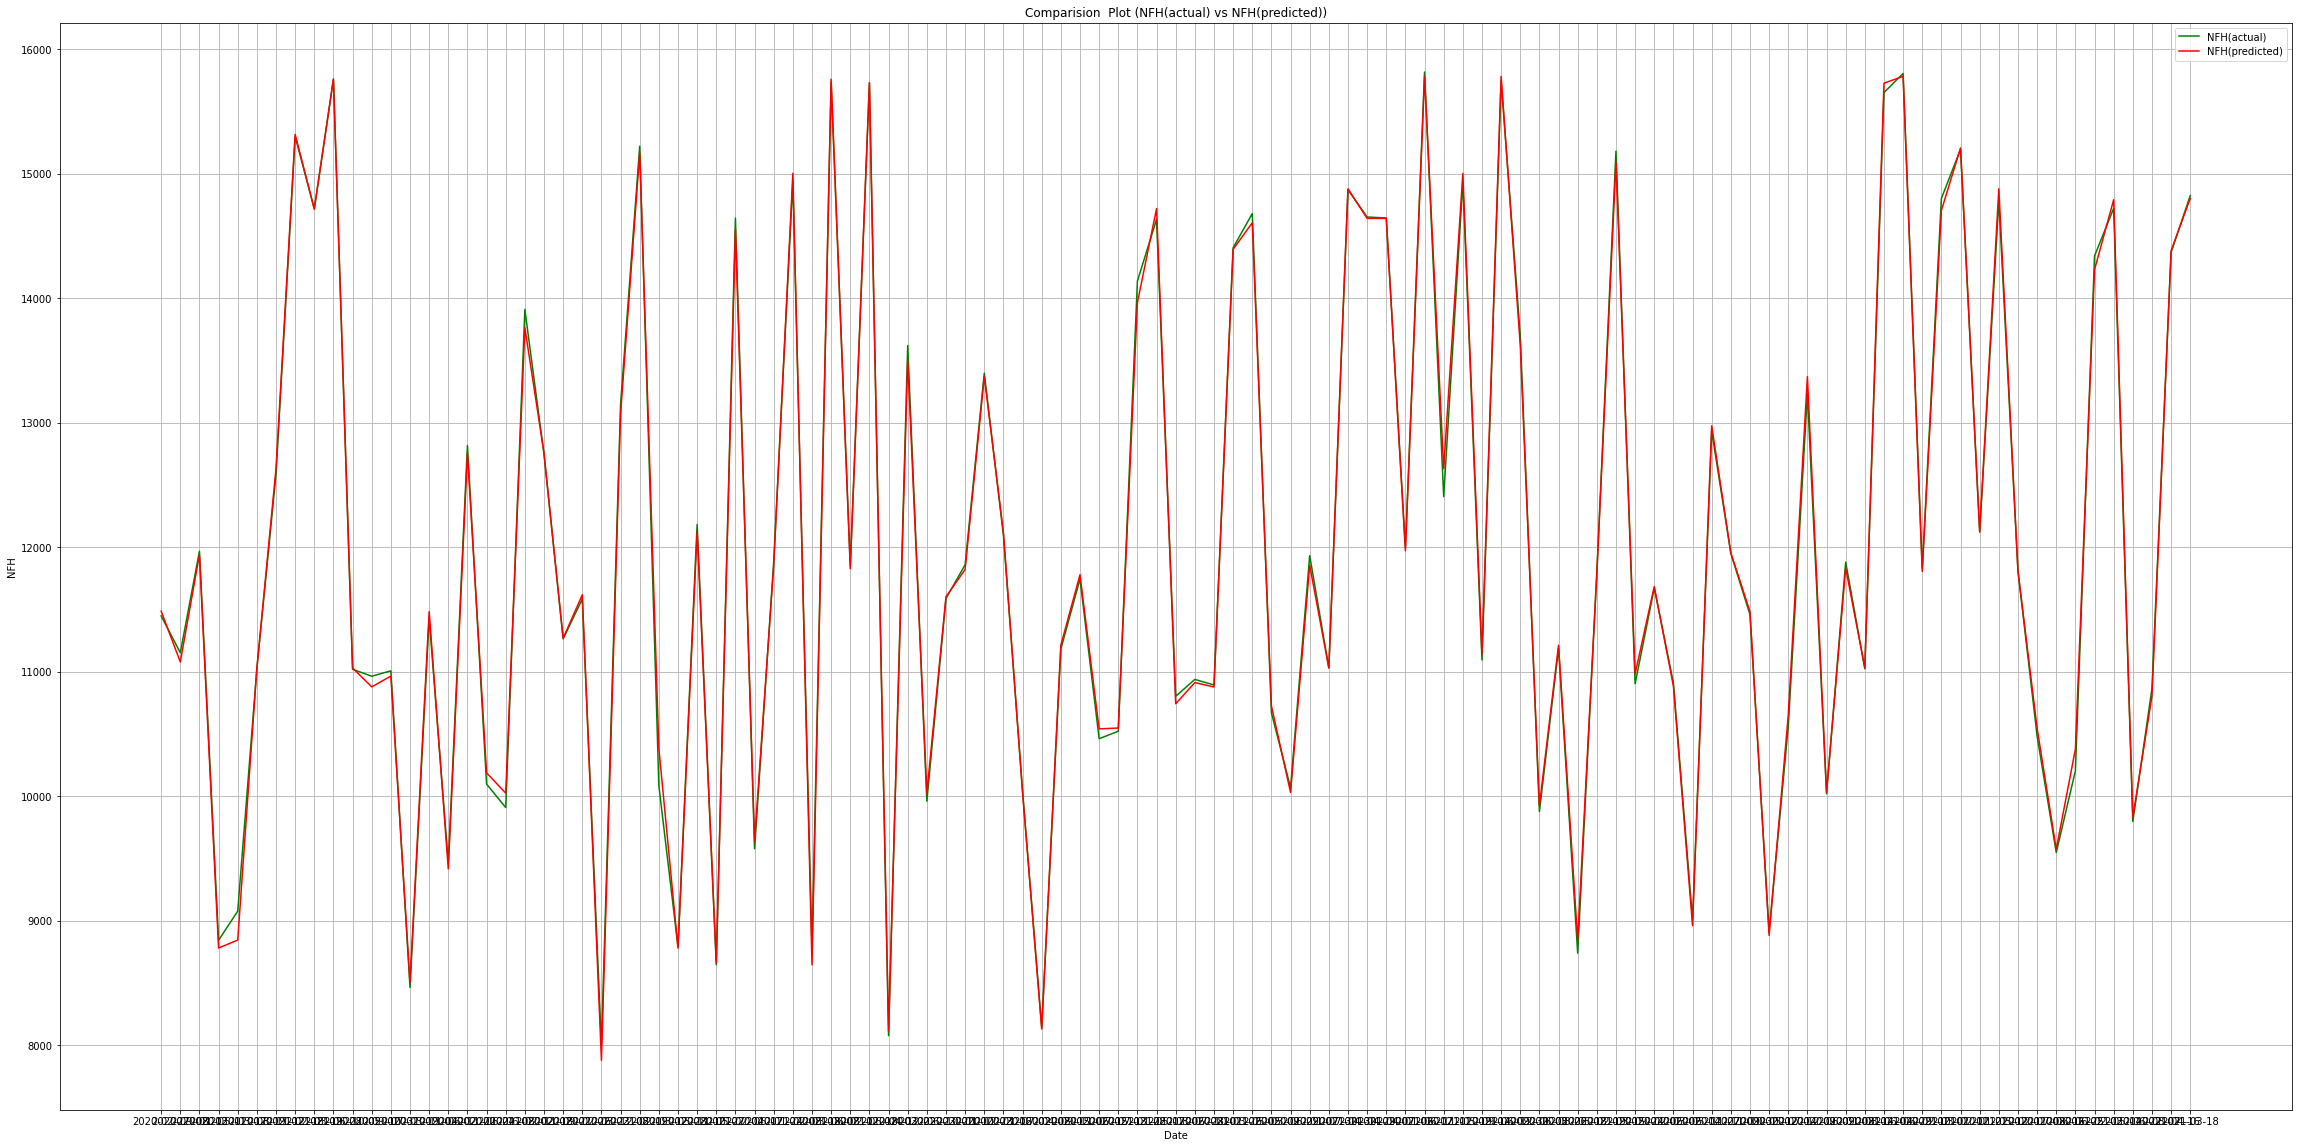

In [27]:
plt.figure(figsize=(40,20))
plt.plot(fg1['Date'],fg1['NFH(actual)'],label='NFH(actual)',color='green')
plt.plot(fg1['Date'],fg1['NFH(predicted)'],label='NFH(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFH(actual) vs NFH(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()


### **NFL training/Prediction**

**Predicting NFL Using Train dataset which has actual samples of NFH and Test dataset which has predicted values of NFH  replacing the actual values so as to accomplish the goal of preditcing both the target columns one after the other ,i would replace the actual values of NFH with the predicted values (y_pred) so as to make predictions for NFL based on the predicted values of NFH and hence i term this mode as pipeline model**

In [28]:
df2=df.copy()
df2=df2.drop(columns=['nfh'])
X=df2.iloc[:,:-1].values
y=df2.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.3)

In [29]:
df2

,Date(IST),NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfl
1,2020-01-02,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,0.571552
2,2020-01-03,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,0.574100
3,2020-01-06,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,0.575098
4,2020-01-07,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,0.557377
5,2020-01-08,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,0.552135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-06-24,0.991474,0.978029,0.063734,0.123039,0.145925,0.302320,0.279636,1138.76,0.063936,0.573867,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,0.983483
353,2021-06-25,0.985429,0.984289,0.059193,0.083988,0.205656,0.432029,0.378875,1832.76,0.091081,0.387393,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,0.986924
354,2021-06-28,0.991094,0.993188,0.024723,0.060763,0.179197,0.325005,0.294814,1277.08,0.090986,0.412344,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,0.994166
355,2021-06-29,1.000000,0.993143,0.116848,0.135800,0.227135,0.595092,0.618669,1810.05,0.075286,0.506894,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,0.998843


In [30]:
X_train=X_train[:,1:]
X_train

array([[0.0, 0.04236074298178172, 0.09596636236304953, ...,
        -0.180300000000001, 0.469999999999999, -2.95000076293945],
       [0.9686152134745278, 0.9655417395396055, 0.124858689815148, ...,
        0.190000000000001, -0.0899999999999999, -0.420000076293945],
       [0.19921519182323033, 0.16431322657711833, 0.153964158976034, ...,
        -0.0899999999999999, 0.900000000000002, 1.2300014495849598],
       ...,
       [0.5295639203847995, 0.5346847132107448, 0.0499745337179111, ...,
        -0.2651, -0.0100000000000016, 0.0699996948242188],
       [0.5415639594782282, 0.5232867523115854, 0.03968698617623775, ...,
        -0.501099999999999, -0.780000000000001, 2.81999969482422],
       [0.388851040628134, 0.39870763204067083, 0.03419747994530286, ...,
        0.0068999999999999105, 0.780000000000001, -1.2200012207031299]],
      dtype=object)

In [31]:
date=X_test[:,:1]
X_test=X_test[:,1:]
X_test

array([[0.5080843887460365, 0.49563787151440564, 0.04233617153201832,
        ..., -0.5403, -1.31, 11.6000003814697],
       [0.468525151296052, 0.4641388195196414, 0.01619268010474393, ...,
        -0.780000000000001, 0.149999999999999, 0.709999084472656],
       [0.563168017092984, 0.5604746121041912, 0.033139660412664494, ...,
        -0.289899999999999, -0.400000000000002, -0.240000724792479],
       ...,
       [0.4362198131517998, 0.4351381146774369, 0.04906798943702908, ...,
        -0.2498, -0.629999999999999, -0.44000053405762096],
       [0.8284701955883638, 0.8339659607445369, 0.06951838278036437, ...,
        -0.0600000000000023, 0.25, -0.319999694824219],
       [0.8901317979828685, 0.8650394274831412, 0.07618819582463696, ...,
        -1.3, -0.27, 2.3500003814697203]], dtype=object)

In [32]:
date=date.reshape(len(date),1)
date=date.flatten()

In [33]:
date

array(['2020-02-27', '2020-09-08', '2020-01-13', '2020-05-11',
       '2020-03-17', '2020-08-19', '2020-11-12', '2021-02-18',
       '2021-03-19', '2021-06-28', '2020-10-05', '2020-09-10',
       '2020-07-31', '2020-03-19', '2020-11-04', '2020-06-02',
       '2020-11-20', '2020-06-24', '2020-06-08', '2021-02-02',
       '2020-11-18', '2020-09-21', '2020-02-26', '2020-03-23',
       '2020-12-08', '2021-02-19', '2020-03-12', '2020-05-28',
       '2020-11-10', '2020-05-27', '2021-02-04', '2020-06-17',
       '2020-01-24', '2021-02-08', '2020-03-18', '2021-06-08',
       '2020-02-12', '2021-06-18', '2020-04-03', '2020-12-22',
       '2020-06-23', '2020-10-20', '2020-01-10', '2020-12-23',
       '2020-01-16', '2020-07-02', '2020-04-08', '2020-09-15',
       '2020-11-06', '2020-07-15', '2020-07-13', '2021-01-28',
       '2021-05-17', '2020-08-06', '2020-07-28', '2020-10-01',
       '2021-03-26', '2021-05-05', '2020-03-09', '2020-06-29',
       '2020-01-07', '2020-07-30', '2021-04-30', '2021-

In [34]:
y_test=y_test.reshape(len(y_test),1)
y_train=y_train.reshape(len(y_train),1)

In [35]:
y_pred1=run1(X_train, X_test, y_train, y_test)

[17:44:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 19 iterations, i.e. alpha=4.968e-07, with an active set of 17 regressors, and the smallest cholesky pivot element being 3.332e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)


[17:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger

[17:44:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model saved succesfully!!!
[17:44:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Loaded Model Sucessfully
Super Learner: 99.832
[2021-08-22 17:44:39] INFO (nni/MainThread) Final result: 0.9983232236644456


In [36]:
y_test1=sc.inverse_transform(y_test.reshape(-1,1))
y_test=y_test1.flatten()
y_test

array([11641.47107998, 11369.2284112 , 12153.12931046,  9164.42848068,
        8711.87539742, 11225.78879311, 12679.24032036, 15289.25681257,
       14525.1060375 , 15764.93742943, 11301.81348464, 11196.55672335,
       11151.97509525,  8254.26137206, 11634.12966184,  9677.1749855 ,
       12890.99246328, 10352.27502738, 10189.02095384, 13520.63742742,
       12882.11744046, 11489.70528597, 11781.98011347,  7783.53794632,
       13277.2972862 , 15200.91610381, 10203.48364301,  8990.48709089,
       12371.27083449,  8971.97131666, 14465.33544415,  9688.70639486,
       12087.3907205 , 14935.589764  ,  8613.86194967, 15750.56324479,
       12090.74330446, 15694.68306934,  8271.38692893, 13349.9014107 ,
       10236.40992547, 11795.55336469, 12035.41437092, 13216.47914214,
       12324.14871826, 10327.02058915,  8279.56991849, 11375.99021576,
       11949.23951039, 10677.24418472, 10800.15507641, 14017.69640688,
       14650.13459793, 10994.85260455, 11165.77114057, 11150.65054883,
      

In [37]:
y_pred1=y_pred1.reshape(len(y_pred1),1)
yhat1=sc.inverse_transform(y_pred1.reshape(-1,1))
y_pred1=yhat1.flatten()
y_pred1

array([11599.804 , 11331.41  , 12176.683 ,  9226.823 ,  9096.313 ,
       11184.416 , 12768.648 , 15301.052 , 14537.956 , 15740.244 ,
       11318.916 , 11148.789 , 11125.316 ,  8570.437 , 11678.402 ,
        9629.38  , 12844.77  , 10411.773 , 10204.841 , 13886.149 ,
       12873.045 , 11515.865 , 11741.947 ,  7894.1626, 13200.229 ,
       15208.312 , 10219.47  ,  8991.789 , 12384.187 ,  8981.504 ,
       14547.09  ,  9813.398 , 12050.774 , 14933.109 ,  8803.433 ,
       15727.998 , 12058.8545, 15699.811 ,  8345.907 , 13521.222 ,
       10103.75  , 11779.168 , 12058.8545, 13322.744 , 12377.766 ,
       10330.651 ,  8343.303 , 11431.368 , 11932.895 , 10774.185 ,
       10766.104 , 14087.947 , 14567.404 , 11022.224 , 11125.316 ,
       11075.31  , 14306.957 , 14568.824 , 10724.233 , 10424.196 ,
       12058.8545, 11249.255 , 14839.545 , 14562.875 , 14650.209 ,
       12254.245 , 15767.848 , 12761.86  , 14950.318 , 11345.149 ,
       15734.771 , 13745.857 , 10216.783 , 11423.288 ,  9197.8

In [38]:
def disp1(y_test,y_pred):
  for i in range(len(y_test)):
    for j in range(len(y_test)):
      if i==j:
        print("The actual value of NFL is {0}, the predicted value of NFL for the same is {1}".format(y_test[i],y_pred[j]))
      else:
        continue

In [39]:
disp1(y_test,y_pred1)

The actual value of NFL is 11641.471079981298, the predicted value of NFL for the same is 11599.8037109375
The actual value of NFL is 11369.2284111983, the predicted value of NFL for the same is 11331.41015625
The actual value of NFL is 12153.1293104622, the predicted value of NFL for the same is 12176.6826171875
The actual value of NFL is 9164.42848067511, the predicted value of NFL for the same is 9226.8232421875
The actual value of NFL is 8711.87539742362, the predicted value of NFL for the same is 9096.3134765625
The actual value of NFL is 11225.788793112, the predicted value of NFL for the same is 11184.416015625
The actual value of NFL is 12679.240320356299, the predicted value of NFL for the same is 12768.6484375
The actual value of NFL is 15289.2568125749, the predicted value of NFL for the same is 15301.0517578125
The actual value of NFL is 14525.106037504, the predicted value of NFL for the same is 14537.9560546875
The actual value of NFL is 15764.937429426001, the predicted 

In [40]:
col1=['Date','NFL(actual)','NFL(predicted)']
fg2=pd.DataFrame(columns = col1)
fg2['Date']=date
fg2['NFL(actual)']=y_test
fg2['NFL(predicted)']=y_pred1
fg2

,Date,NFL(actual),NFL(predicted)
0,2020-02-27,11641.471080,11599.803711
1,2020-09-08,11369.228411,11331.410156
2,2020-01-13,12153.129310,12176.682617
3,2020-05-11,9164.428481,9226.823242
4,2020-03-17,8711.875397,9096.313477
...,...,...,...
102,2021-05-14,14746.534002,14753.619141
103,2020-06-22,10004.574643,10008.422852
104,2020-08-07,11087.078088,11075.309570
105,2021-04-16,14280.071672,14304.148438


In [41]:
fg2.to_csv('Independent model analysis: NFL')

[2021-08-22 17:44:40] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:40] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:40] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:40] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


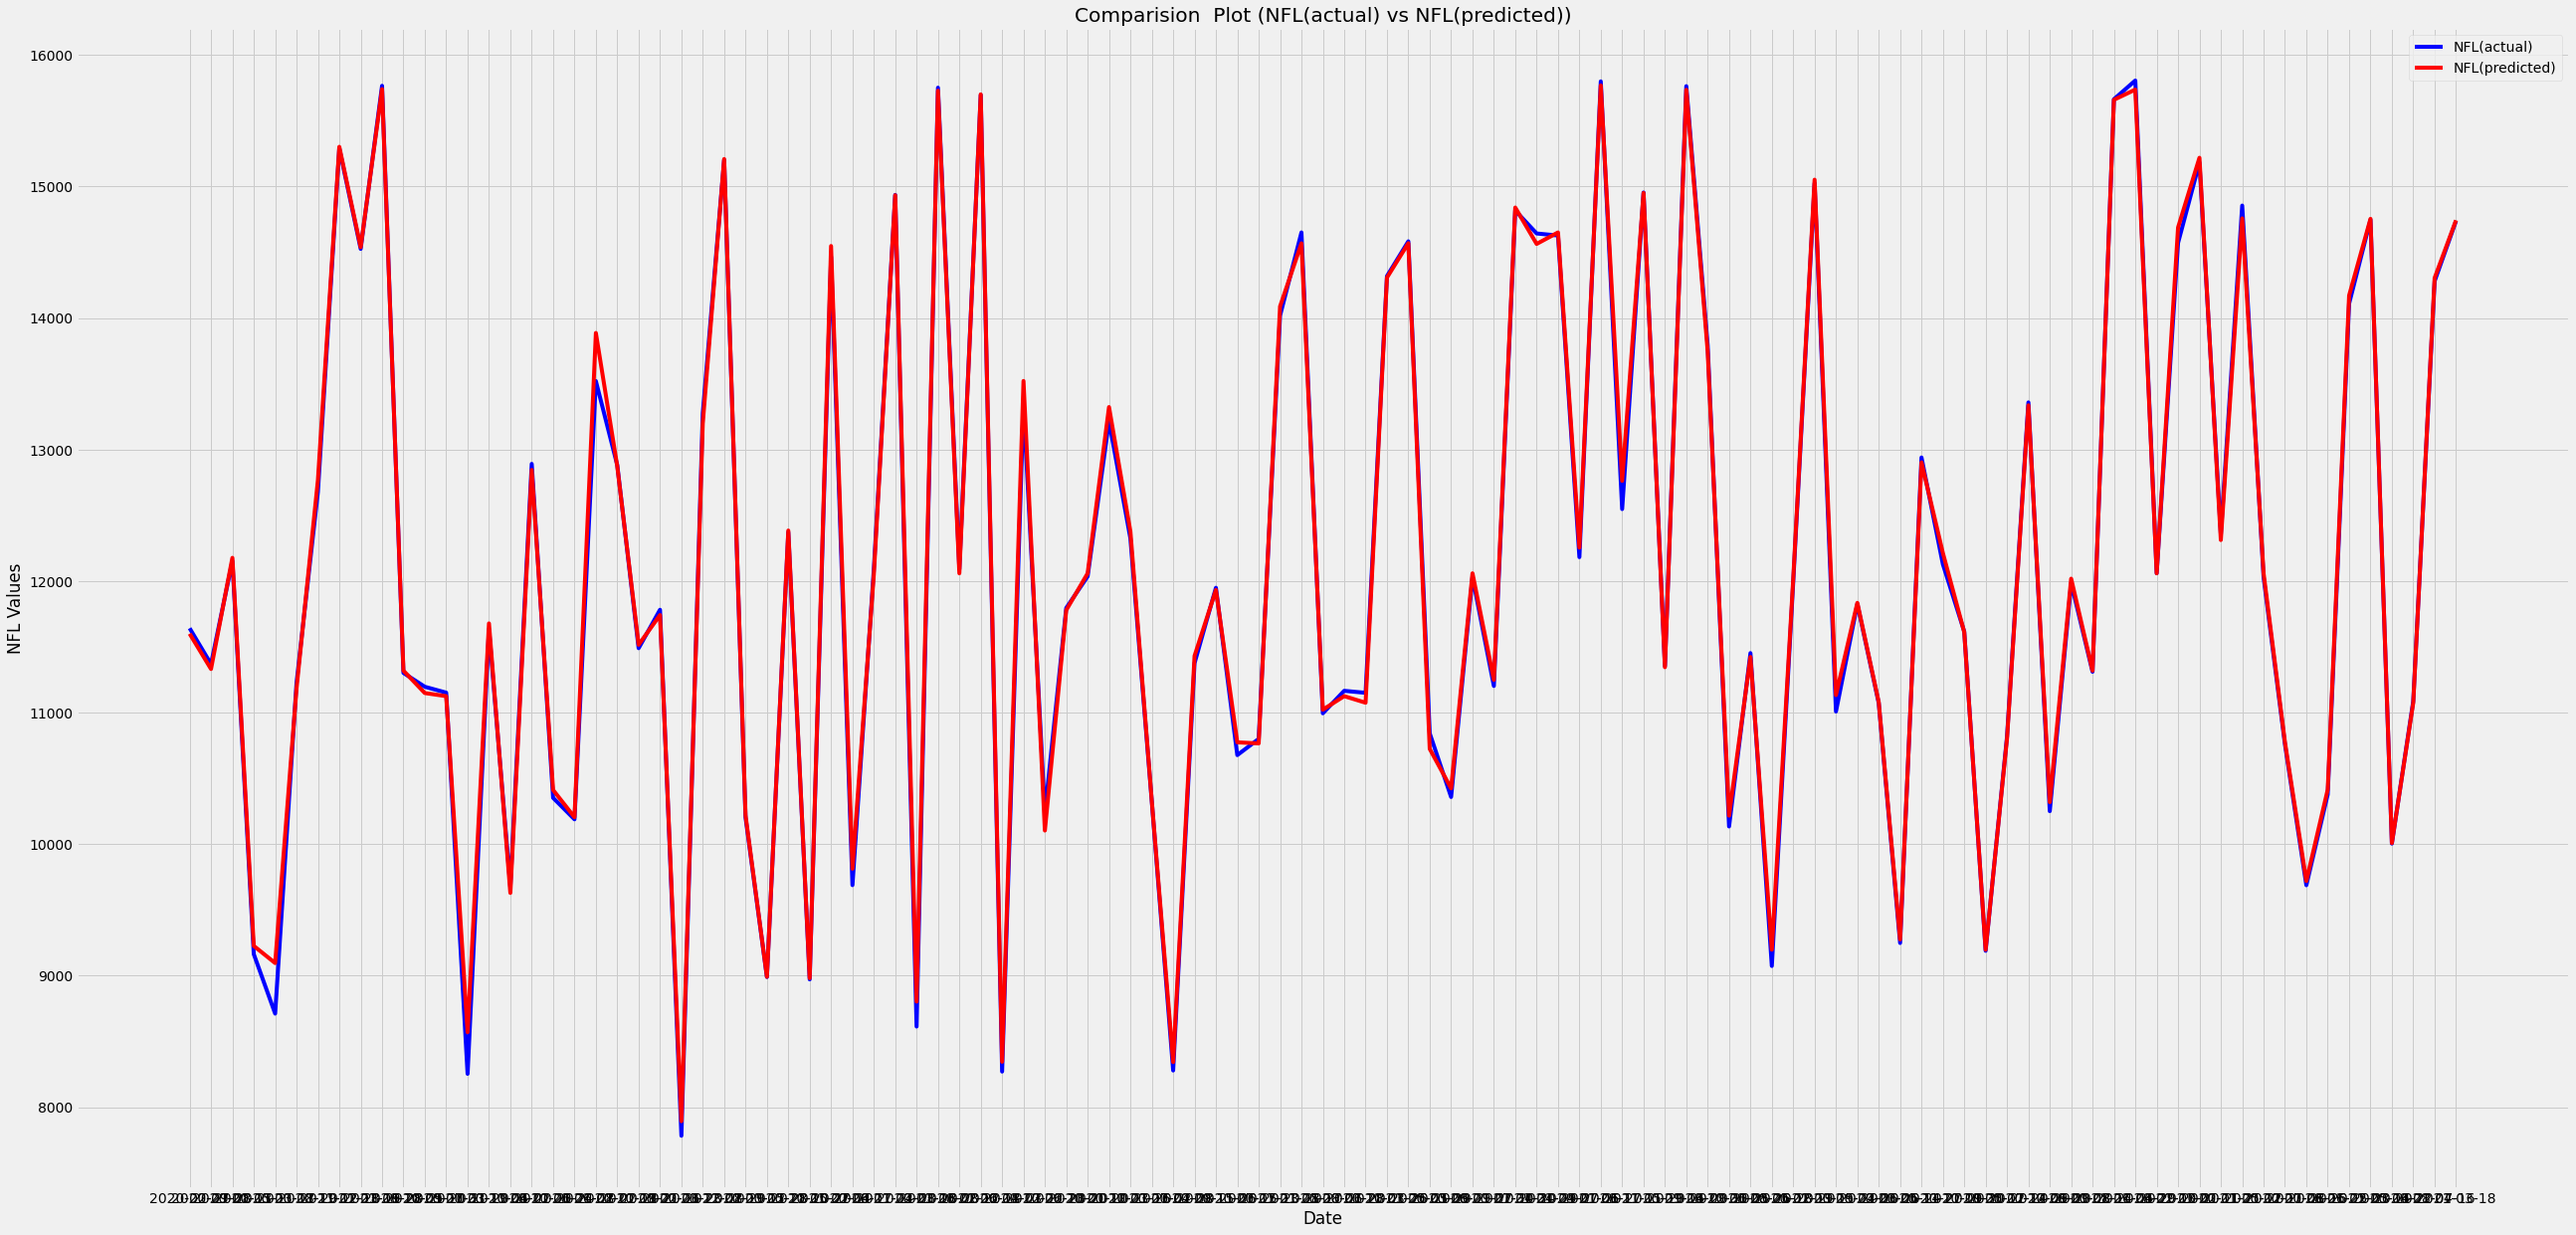

In [42]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test,label='NFL(actual)',color='blue')
plt.plot(date,y_pred1,label='NFL(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFL(actual) vs NFL(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFL Values')
plt.style.use('fivethirtyeight')
plt.show()

In [43]:
col=['NFH(actual)','NFL(actual)','NFH(predicted)','NFL(predicted)']
fg=pd.DataFrame(columns = col)
fg.iloc[:,0]=fg1['NFH(actual)']
fg.iloc[:,1]=fg2['NFL(actual)']
fg.iloc[:,2]=y_pred
fg.iloc[:,3]=y_pred1
fg['Amount of Deviation:NFH (actual vs prediction)']=abs(fg['NFH(actual)']-fg['NFH(predicted)']).astype(float)
fg['Amount of Deviation:NFL (actual vs prediction)']=abs(fg['NFL(actual)']-fg['NFL(predicted)']).astype(float)
display(fg)
fg.to_csv('Independent model Analysis.csv')

,NFH(actual),NFL(actual),NFH(predicted),NFL(predicted),Amount of Deviation:NFH (actual vs prediction),Amount of Deviation:NFL (actual vs prediction)
0,11447.724682,11641.471080,11486.443359,11599.803711,38.718677,41.667369
1,11152.199831,11369.228411,11077.665039,11331.410156,74.534792,37.818255
2,11966.991009,12153.129310,11939.297852,12176.682617,27.693157,23.553307
3,8843.312217,9164.428481,8780.974609,9226.823242,62.337608,62.394762
4,9077.290301,8711.875397,8845.386719,9096.313477,231.903582,384.438079
...,...,...,...,...,...,...
102,14720.573452,14746.534002,14789.562500,14753.619141,68.989048,7.085138
103,9797.075753,10004.574643,9831.324219,10008.422852,34.248466,3.848209
104,10865.237878,11087.078088,10803.599609,11075.309570,61.638268,11.768518
105,14366.697618,14280.071672,14380.678711,14304.148438,13.981093,24.076765


## **Dependent model construction/implementation**

**For NFH model fitting/prediction we shall remove actual NFL values as depcited in the order of the columns in the actual dataset**

###**NFH training/prediction**

In [44]:
df1=df.copy()
df1=df1.drop(columns=['nfl'])
X=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.3)

In [45]:
df1

,Date(IST),NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh
1,2020-01-02,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,0.537827
2,2020-01-03,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,0.549968
3,2020-01-06,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,0.552886
4,2020-01-07,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,0.545863
5,2020-01-08,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,0.539722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-06-24,0.991474,0.978029,0.063734,0.123039,0.145925,0.302320,0.279636,1138.76,0.063936,0.573867,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,0.993836
353,2021-06-25,0.985429,0.984289,0.059193,0.083988,0.205656,0.432029,0.378875,1832.76,0.091081,0.387393,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,0.990768
354,2021-06-28,0.991094,0.993188,0.024723,0.060763,0.179197,0.325005,0.294814,1277.08,0.090986,0.412344,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,0.993554
355,2021-06-29,1.000000,0.993143,0.116848,0.135800,0.227135,0.595092,0.618669,1810.05,0.075286,0.506894,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,0.998678


In [46]:
X_train=X_train[:,1:]
X_train

array([[0.0, 0.04236074298178172, 0.09596636236304953, ...,
        -0.180300000000001, 0.469999999999999, -2.95000076293945],
       [0.9686152134745278, 0.9655417395396055, 0.124858689815148, ...,
        0.190000000000001, -0.0899999999999999, -0.420000076293945],
       [0.19921519182323033, 0.16431322657711833, 0.153964158976034, ...,
        -0.0899999999999999, 0.900000000000002, 1.2300014495849598],
       ...,
       [0.5295639203847995, 0.5346847132107448, 0.0499745337179111, ...,
        -0.2651, -0.0100000000000016, 0.0699996948242188],
       [0.5415639594782282, 0.5232867523115854, 0.03968698617623775, ...,
        -0.501099999999999, -0.780000000000001, 2.81999969482422],
       [0.388851040628134, 0.39870763204067083, 0.03419747994530286, ...,
        0.0068999999999999105, 0.780000000000001, -1.2200012207031299]],
      dtype=object)

In [47]:
X_test

array([['2020-02-27', 0.5080843887460365, 0.49563787151440564, ...,
        -0.5403, -1.31, 11.6000003814697],
       ['2020-09-08', 0.468525151296052, 0.4641388195196414, ...,
        -0.780000000000001, 0.149999999999999, 0.709999084472656],
       ['2020-01-13', 0.563168017092984, 0.5604746121041912, ...,
        -0.289899999999999, -0.400000000000002, -0.240000724792479],
       ...,
       ['2020-08-07', 0.4362198131517998, 0.4351381146774369, ...,
        -0.2498, -0.629999999999999, -0.44000053405762096],
       ['2021-04-16', 0.8284701955883638, 0.8339659607445369, ...,
        -0.0600000000000023, 0.25, -0.319999694824219],
       ['2021-03-18', 0.8901317979828685, 0.8650394274831412, ..., -1.3,
        -0.27, 2.3500003814697203]], dtype=object)

In [48]:
date=X_test[:,:1]
X_test=X_test[:,1:]
X_test

array([[0.5080843887460365, 0.49563787151440564, 0.04233617153201832,
        ..., -0.5403, -1.31, 11.6000003814697],
       [0.468525151296052, 0.4641388195196414, 0.01619268010474393, ...,
        -0.780000000000001, 0.149999999999999, 0.709999084472656],
       [0.563168017092984, 0.5604746121041912, 0.033139660412664494, ...,
        -0.289899999999999, -0.400000000000002, -0.240000724792479],
       ...,
       [0.4362198131517998, 0.4351381146774369, 0.04906798943702908, ...,
        -0.2498, -0.629999999999999, -0.44000053405762096],
       [0.8284701955883638, 0.8339659607445369, 0.06951838278036437, ...,
        -0.0600000000000023, 0.25, -0.319999694824219],
       [0.8901317979828685, 0.8650394274831412, 0.07618819582463696, ...,
        -1.3, -0.27, 2.3500003814697203]], dtype=object)

In [49]:
date=date.reshape(len(date),1)
date=date.flatten()

In [50]:
date

array(['2020-02-27', '2020-09-08', '2020-01-13', '2020-05-11',
       '2020-03-17', '2020-08-19', '2020-11-12', '2021-02-18',
       '2021-03-19', '2021-06-28', '2020-10-05', '2020-09-10',
       '2020-07-31', '2020-03-19', '2020-11-04', '2020-06-02',
       '2020-11-20', '2020-06-24', '2020-06-08', '2021-02-02',
       '2020-11-18', '2020-09-21', '2020-02-26', '2020-03-23',
       '2020-12-08', '2021-02-19', '2020-03-12', '2020-05-28',
       '2020-11-10', '2020-05-27', '2021-02-04', '2020-06-17',
       '2020-01-24', '2021-02-08', '2020-03-18', '2021-06-08',
       '2020-02-12', '2021-06-18', '2020-04-03', '2020-12-22',
       '2020-06-23', '2020-10-20', '2020-01-10', '2020-12-23',
       '2020-01-16', '2020-07-02', '2020-04-08', '2020-09-15',
       '2020-11-06', '2020-07-15', '2020-07-13', '2021-01-28',
       '2021-05-17', '2020-08-06', '2020-07-28', '2020-10-01',
       '2021-03-26', '2021-05-05', '2020-03-09', '2020-06-29',
       '2020-01-07', '2020-07-30', '2021-04-30', '2021-

In [51]:
y_test=y_test.reshape(len(y_test),1)
y_train=y_train.reshape(len(y_train),1)

In [52]:
X_train.shape

(248, 18)

In [53]:
y_train.shape

(248, 1)

In [54]:
y_pred=run2(X_train, X_test, y_train, y_test)

[17:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[17:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger

[17:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model saved succesfully!!!
[17:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Loaded Model Sucessfully
Super Learner: 99.886
[2021-08-22 17:44:46] INFO (nni/MainThread) Final result: 0.9988607552187702


In [55]:
len(X_train)

248

In [56]:
len(y_train)

248

In [57]:
len(X_test)

107

In [58]:
len(y_test)

107

In [59]:
y_test1=sc.inverse_transform(y_test.reshape(-1,1))
y_test=y_test1.flatten()
y_test

array([11447.72468248, 11152.19983067, 11966.99100871,  8843.31221689,
        9077.29030106, 11023.85712003, 12586.27899079, 15296.92643339,
       14715.03898419, 15759.70970959, 11019.33351177, 10963.5599246 ,
       11006.76581917,  8464.79100768, 11431.77434648,  9464.82396887,
       12816.34502192, 10097.77037937,  9909.18438896, 13908.95666273,
       12745.78901131, 11263.85528096, 11583.10477661,  8002.00346145,
       13146.11908935, 15218.57131312, 10083.49692321,  8791.44290207,
       12182.07283206,  8647.82944537, 14641.42959048,  9578.04841542,
       11881.9653508 , 14942.03601905,  8770.41852833, 15734.41031474,
       11850.92588564, 15726.64859913,  8077.72297249, 13618.34450018,
        9960.10338922, 11587.30507266, 11859.28538545, 13396.68095281,
       12094.8723756 , 10042.0445404 ,  8145.05208607, 11180.92521652,
       11744.25632605, 10461.94477813, 10521.62933209, 14136.58099241,
       14631.28659454, 10802.56922869, 10937.87771038, 10893.41399324,
      

In [60]:
y_pred=y_pred.reshape(len(y_pred),1)
yhat=sc.inverse_transform(y_pred.reshape(-1,1))
y_pred=yhat.flatten()
y_pred

array([11482.144 , 11078.535 , 11936.015 ,  8780.445 ,  8850.772 ,
       11024.971 , 12624.687 , 15308.97  , 14709.586 , 15749.023 ,
       11022.217 , 10879.051 , 10962.185 ,  8512.676 , 11482.208 ,
        9417.426 , 12748.424 , 10177.56  , 10016.823 , 13753.003 ,
       12748.424 , 11260.977 , 11610.5   ,  7923.347 , 13063.671 ,
       15160.749 , 10379.0625,  8779.758 , 12119.179 ,  8669.215 ,
       14543.978 ,  9637.939 , 11850.763 , 14994.322 ,  8654.883 ,
       15758.276 , 11823.23  , 15728.574 ,  8141.899 , 13493.871 ,
       10024.199 , 11595.302 , 11824.02  , 13363.166 , 12122.638 ,
       10024.4375,  8121.848 , 11206.2705, 11772.549 , 10532.529 ,
       10539.417 , 13946.646 , 14698.747 , 10736.827 , 10902.743 ,
       10886.426 , 14375.926 , 14608.102 , 10727.021 , 10024.4375,
       11850.763 , 11022.217 , 14860.62  , 14634.904 , 14630.209 ,
       11971.237 , 15773.418 , 12625.496 , 14993.275 , 11140.288 ,
       15773.418 , 13610.842 ,  9913.136 , 11206.2705,  8844.2

In [61]:
disp(y_test,y_pred)

The actual value of NFH is 11447.724682482833, the predicted value of NFH for the same is 11482.1435546875
The actual value of NFH is 11152.19983067032, the predicted value of NFH for the same is 11078.53515625
The actual value of NFH is 11966.991008712539, the predicted value of NFH for the same is 11936.0146484375
The actual value of NFH is 8843.312216887325, the predicted value of NFH for the same is 8780.4453125
The actual value of NFH is 9077.290301057683, the predicted value of NFH for the same is 8850.7724609375
The actual value of NFH is 11023.857120032237, the predicted value of NFH for the same is 11024.970703125
The actual value of NFH is 12586.27899079144, the predicted value of NFH for the same is 12624.6865234375
The actual value of NFH is 15296.926433386187, the predicted value of NFH for the same is 15308.9697265625
The actual value of NFH is 14715.03898418691, the predicted value of NFH for the same is 14709.5859375
The actual value of NFH is 15759.709709594528, the pr

In [62]:
col=['Date','NFH(actual)','NFH(predicted)']
fg3=pd.DataFrame(columns = col)
fg3['Date']=date
fg3['NFH(actual)']=y_test
fg3['NFH(predicted)']=y_pred
fg3

,Date,NFH(actual),NFH(predicted)
0,2020-02-27,11447.724682,11482.143555
1,2020-09-08,11152.199831,11078.535156
2,2020-01-13,11966.991009,11936.014648
3,2020-05-11,8843.312217,8780.445312
4,2020-03-17,9077.290301,8850.772461
...,...,...,...
102,2021-05-14,14720.573452,14779.966797
103,2020-06-22,9797.075753,9823.059570
104,2020-08-07,10865.237878,10798.129883
105,2021-04-16,14366.697618,14375.772461


In [63]:
fg3.to_csv('Dependent model analysis: NFH')

[2021-08-22 17:44:46] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:46] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:46] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:46] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


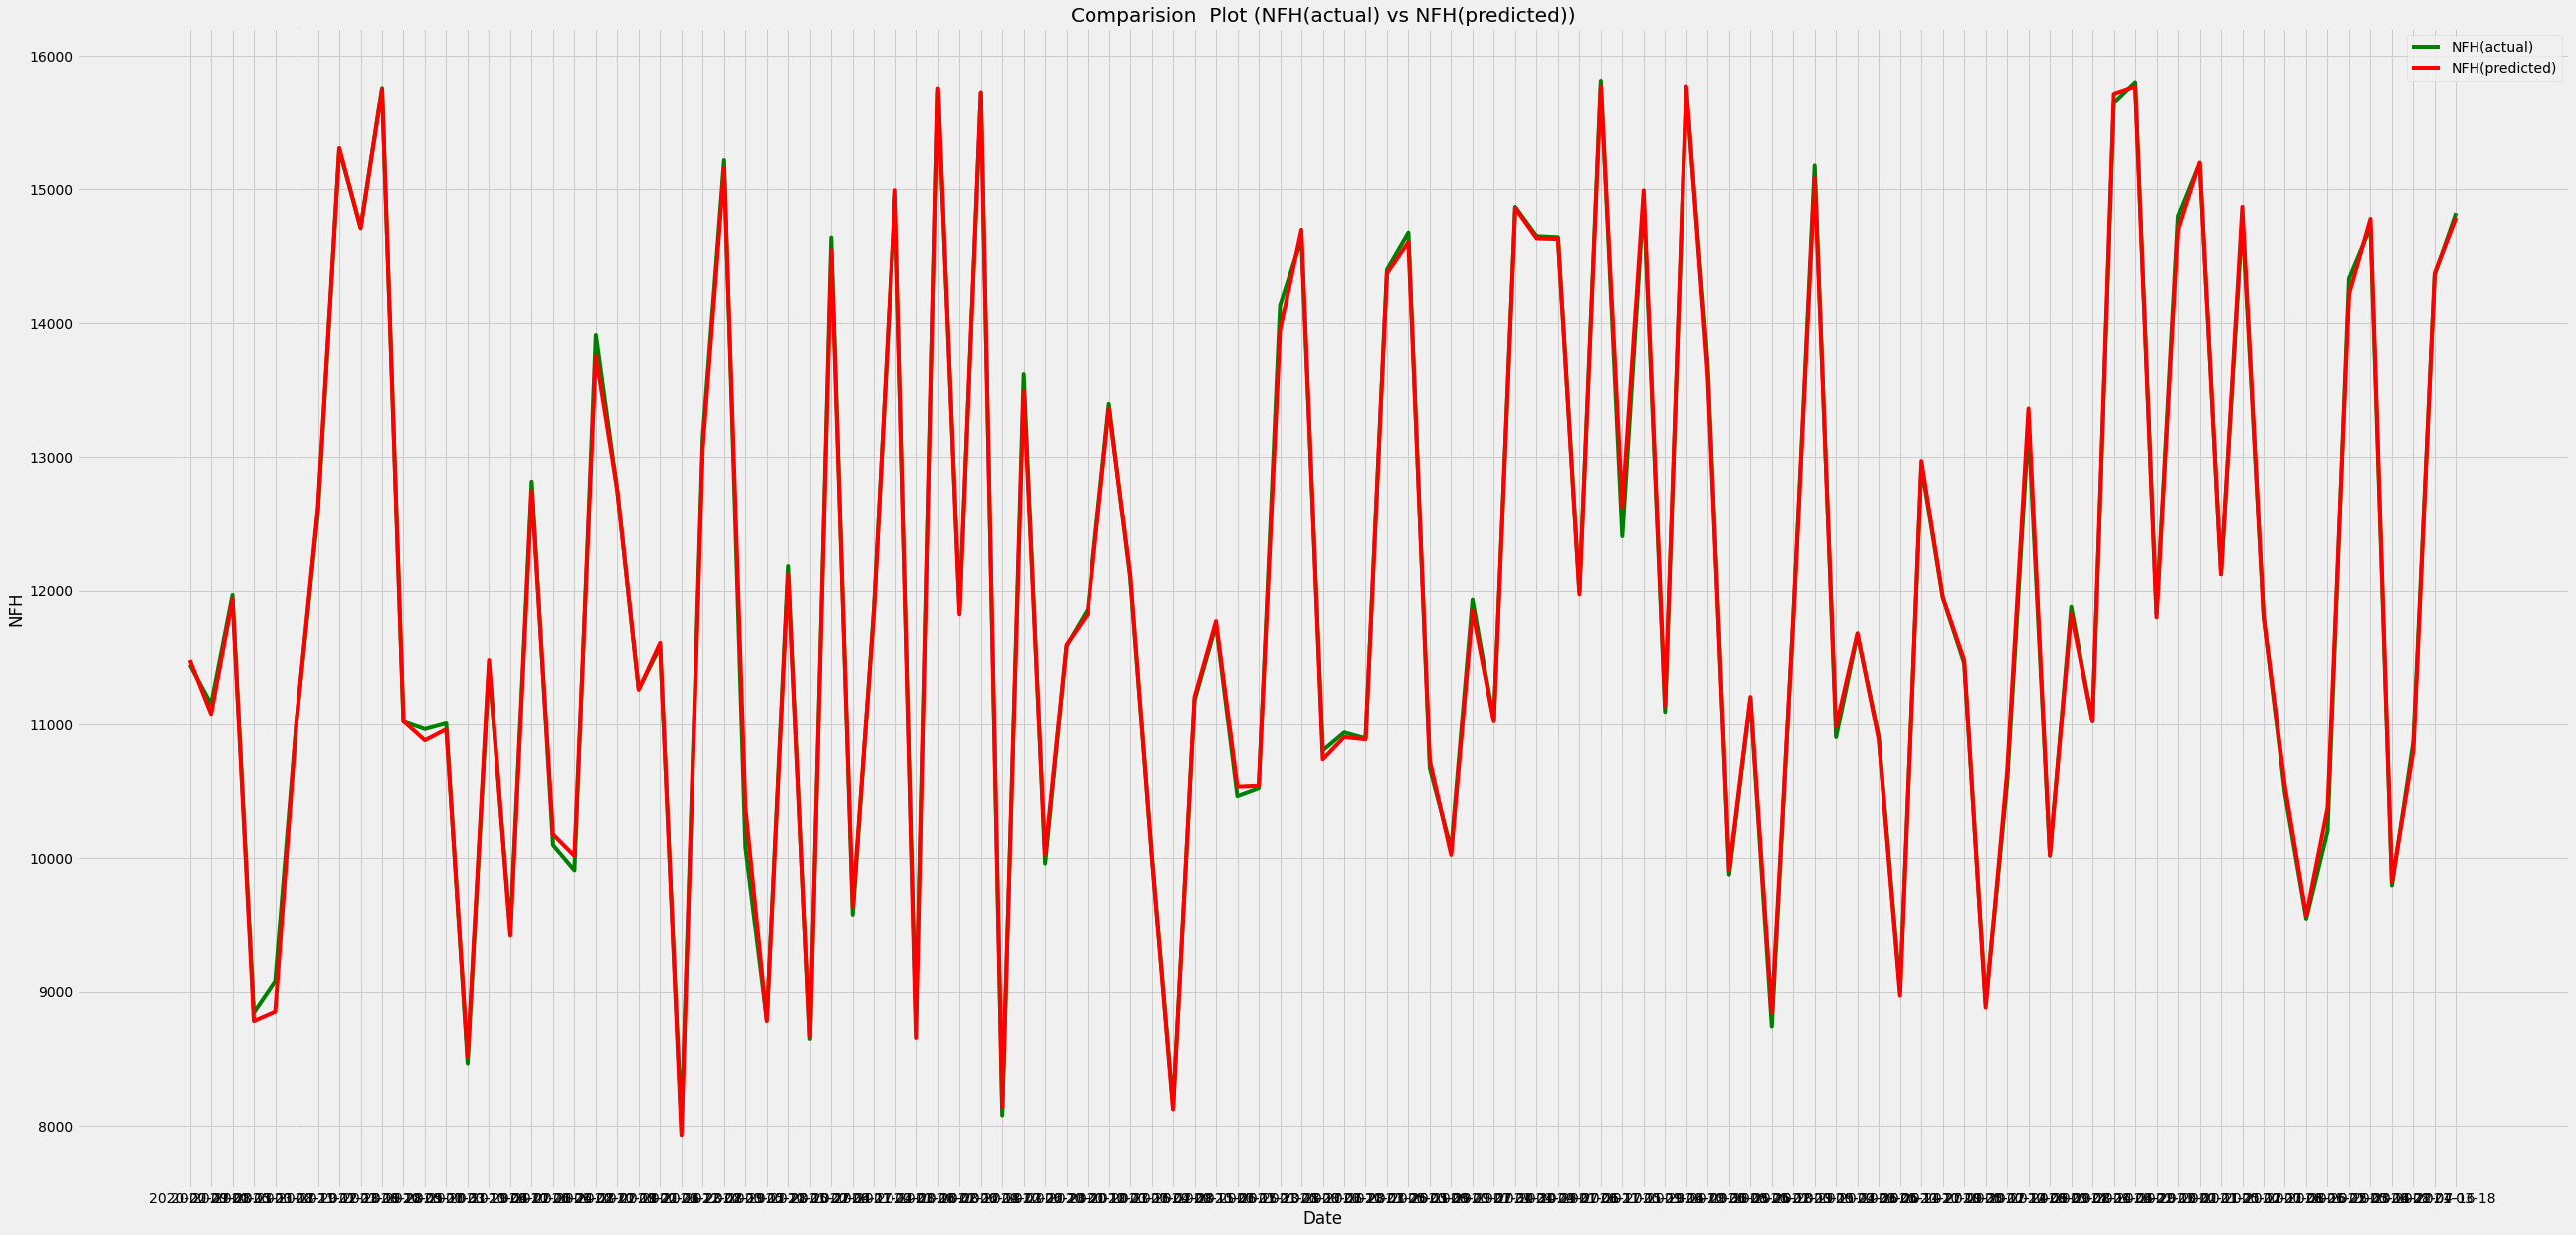

In [64]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test,label='NFH(actual)',color='green')
plt.plot(date,y_pred,label='NFH(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFH(actual) vs NFH(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH')
plt.style.use('fivethirtyeight')
plt.show()


### **NFL training/prediction**

In [65]:
df2=df.copy()
X=df2.iloc[:,:-1].values
y=df2.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.3)

In [66]:
df2

,Date(IST),NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,nfh,nfl
1,2020-01-02,0.550682,0.561093,0.002510,0.000000,0.242584,0.135338,0.175187,63.95,0.118131,0.111622,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,0.537827,0.571552
2,2020-01-03,0.560137,0.565260,0.028025,0.019513,0.258091,0.069939,0.220661,-1029.2,0.073016,0.434012,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,0.549968,0.574100
3,2020-01-06,0.569330,0.562600,0.017197,0.028500,0.221182,0.160870,0.223541,-23.7,0.023929,0.781353,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,0.552886,0.575098
4,2020-01-07,0.565106,0.541491,0.019677,0.040146,0.205564,0.198589,0.235298,311.19,0.107916,0.174655,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,0.545863,0.557377
5,2020-01-08,0.554650,0.537361,0.022416,0.040630,0.210057,0.283235,0.302076,748.4,0.058451,0.523309,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,0.539722,0.552135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-06-24,0.991474,0.978029,0.063734,0.123039,0.145925,0.302320,0.279636,1138.76,0.063936,0.573867,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,0.993836,0.983483
353,2021-06-25,0.985429,0.984289,0.059193,0.083988,0.205656,0.432029,0.378875,1832.76,0.091081,0.387393,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,0.990768,0.986924
354,2021-06-28,0.991094,0.993188,0.024723,0.060763,0.179197,0.325005,0.294814,1277.08,0.090986,0.412344,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,0.993554,0.994166
355,2021-06-29,1.000000,0.993143,0.116848,0.135800,0.227135,0.595092,0.618669,1810.05,0.075286,0.506894,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,0.998678,0.998843


In [67]:
X_train=X_train[:,1:]
X_train

array([[0.0, 0.04236074298178172, 0.09596636236304953, ...,
        0.469999999999999, -2.95000076293945, 0.020831639021573034],
       [0.9686152134745278, 0.9655417395396055, 0.124858689815148, ...,
        -0.0899999999999999, -0.420000076293945, 0.9691353257033738],
       [0.19921519182323033, 0.16431322657711833, 0.153964158976034, ...,
        0.900000000000002, 1.2300014495849598, 0.1635654313301277],
       ...,
       [0.5295639203847995, 0.5346847132107448, 0.0499745337179111, ...,
        -0.0100000000000016, 0.0699996948242188, 0.5189654485651897],
       [0.5415639594782282, 0.5232867523115854, 0.03968698617623775, ...,
        -0.780000000000001, 2.81999969482422, 0.5215690457998349],
       [0.388851040628134, 0.39870763204067083, 0.03419747994530286, ...,
        0.780000000000001, -1.2200012207031299, 0.38036964970087095]],
      dtype=object)

In [68]:
date=X_test[:,:1]
X_test=X_test[:,1:]
X_test

array([[0.5080843887460365, 0.49563787151440564, 0.04233617153201832,
        ..., -1.31, 11.6000003814697, 0.4892315700158695],
       [0.468525151296052, 0.4641388195196414, 0.01619268010474393, ...,
        0.149999999999999, 0.709999084472656, 0.45466747573812494],
       [0.563168017092984, 0.5604746121041912, 0.033139660412664494, ...,
        -0.400000000000002, -0.240000724792479, 0.5499640943534437],
       ...,
       [0.4362198131517998, 0.4351381146774369, 0.04906798943702908, ...,
        -0.629999999999999, -0.44000053405762096, 0.42110488383106015],
       [0.8284701955883638, 0.8339659607445369, 0.06951838278036437, ...,
        0.25, -0.319999694824219, 0.8306297811008293],
       [0.8901317979828685, 0.8650394274831412, 0.07618819582463696, ...,
        -0.27, 2.3500003814697203, 0.8839900371720636]], dtype=object)

In [69]:
date=date.reshape(len(date),1)
date=date.flatten()

In [70]:
date

array(['2020-02-27', '2020-09-08', '2020-01-13', '2020-05-11',
       '2020-03-17', '2020-08-19', '2020-11-12', '2021-02-18',
       '2021-03-19', '2021-06-28', '2020-10-05', '2020-09-10',
       '2020-07-31', '2020-03-19', '2020-11-04', '2020-06-02',
       '2020-11-20', '2020-06-24', '2020-06-08', '2021-02-02',
       '2020-11-18', '2020-09-21', '2020-02-26', '2020-03-23',
       '2020-12-08', '2021-02-19', '2020-03-12', '2020-05-28',
       '2020-11-10', '2020-05-27', '2021-02-04', '2020-06-17',
       '2020-01-24', '2021-02-08', '2020-03-18', '2021-06-08',
       '2020-02-12', '2021-06-18', '2020-04-03', '2020-12-22',
       '2020-06-23', '2020-10-20', '2020-01-10', '2020-12-23',
       '2020-01-16', '2020-07-02', '2020-04-08', '2020-09-15',
       '2020-11-06', '2020-07-15', '2020-07-13', '2021-01-28',
       '2021-05-17', '2020-08-06', '2020-07-28', '2020-10-01',
       '2021-03-26', '2021-05-05', '2020-03-09', '2020-06-29',
       '2020-01-07', '2020-07-30', '2021-04-30', '2021-

In [71]:
y_test=y_test.reshape(len(y_test),1)
y_train=y_train.reshape(len(y_train),1)

In [72]:
y_pred1=run3(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 25 iterations, i.e. alpha=1.617e-05, with an active set of 18 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)


[17:44:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 20 iterations, i.e. alpha=7.578e-07, with an active set of 17 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 20 iterations, i.e. alpha=5.152e-07, with an active set of 17 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3

[17:44:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger

[17:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model saved succesfully!!!
[17:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Loaded Model Sucessfully
Super Learner: 99.801
[2021-08-22 17:44:53] INFO (nni/MainThread) Final result: 0.998014302993324


In [73]:
y_test1=sc.inverse_transform(y_test.reshape(-1,1))
y_test=y_test1.flatten()
y_test

array([11641.47107998, 11369.2284112 , 12153.12931046,  9164.42848068,
        8711.87539742, 11225.78879311, 12679.24032036, 15289.25681257,
       14525.1060375 , 15764.93742943, 11301.81348464, 11196.55672335,
       11151.97509525,  8254.26137206, 11634.12966184,  9677.1749855 ,
       12890.99246328, 10352.27502738, 10189.02095384, 13520.63742742,
       12882.11744046, 11489.70528597, 11781.98011347,  7783.53794632,
       13277.2972862 , 15200.91610381, 10203.48364301,  8990.48709089,
       12371.27083449,  8971.97131666, 14465.33544415,  9688.70639486,
       12087.3907205 , 14935.589764  ,  8613.86194967, 15750.56324479,
       12090.74330446, 15694.68306934,  8271.38692893, 13349.9014107 ,
       10236.40992547, 11795.55336469, 12035.41437092, 13216.47914214,
       12324.14871826, 10327.02058915,  8279.56991849, 11375.99021576,
       11949.23951039, 10677.24418472, 10800.15507641, 14017.69640688,
       14650.13459793, 10994.85260455, 11165.77114057, 11150.65054883,
      

In [74]:
y_pred1=y_pred1.reshape(len(y_pred1),1)
yhat1=sc.inverse_transform(y_pred1.reshape(-1,1))
y_pred1=yhat1.flatten()
y_pred1

array([11605.999 , 11330.513 , 12141.8955,  9242.061 ,  8887.209 ,
       11213.299 , 12760.092 , 15318.689 , 14507.754 , 15729.642 ,
       11300.878 , 11143.498 , 11146.345 ,  8704.835 , 11682.094 ,
        9576.138 , 12877.12  , 10413.828 , 10075.179 , 13783.671 ,
       12844.925 , 11516.016 , 11749.238 ,  7991.869 , 13176.016 ,
       15227.026 , 10137.842 ,  9058.249 , 12364.511 ,  9041.772 ,
       14503.966 ,  9825.686 , 12033.975 , 14962.143 ,  8950.607 ,
       15715.455 , 12068.55  , 15606.556 ,  8452.348 , 13542.953 ,
       10063.312 , 11773.526 , 12029.782 , 13334.677 , 12366.204 ,
       10318.661 ,  8298.133 , 11435.944 , 11965.147 , 10726.959 ,
       10766.585 , 14122.764 , 14688.602 , 10985.131 , 11142.245 ,
       11078.961 , 14294.946 , 14537.376 , 10677.932 , 10411.283 ,
       12105.632 , 11202.791 , 14834.026 , 14552.605 , 14684.375 ,
       12240.521 , 15768.13  , 12760.092 , 14908.875 , 11352.277 ,
       15717.149 , 13746.975 , 10164.126 , 11435.944 ,  9218.8

In [75]:
disp1(y_test,y_pred1)

The actual value of NFL is 11641.471079981298, the predicted value of NFL for the same is 11605.9990234375
The actual value of NFL is 11369.2284111983, the predicted value of NFL for the same is 11330.5126953125
The actual value of NFL is 12153.1293104622, the predicted value of NFL for the same is 12141.8955078125
The actual value of NFL is 9164.42848067511, the predicted value of NFL for the same is 9242.060546875
The actual value of NFL is 8711.87539742362, the predicted value of NFL for the same is 8887.208984375
The actual value of NFL is 11225.788793112, the predicted value of NFL for the same is 11213.298828125
The actual value of NFL is 12679.240320356299, the predicted value of NFL for the same is 12760.091796875
The actual value of NFL is 15289.2568125749, the predicted value of NFL for the same is 15318.689453125
The actual value of NFL is 14525.106037504, the predicted value of NFL for the same is 14507.75390625
The actual value of NFL is 15764.937429426001, the predicted v

In [76]:
col1=['Date','NFL(actual)','NFL(predicted)']
fg4=pd.DataFrame(columns = col1)
fg4['Date']=date
fg4['NFL(actual)']=y_test
fg4['NFL(predicted)']=y_pred1
fg4

,Date,NFL(actual),NFL(predicted)
0,2020-02-27,11641.471080,11605.999023
1,2020-09-08,11369.228411,11330.512695
2,2020-01-13,12153.129310,12141.895508
3,2020-05-11,9164.428481,9242.060547
4,2020-03-17,8711.875397,8887.208984
...,...,...,...
102,2021-05-14,14746.534002,14826.954102
103,2020-06-22,10004.574643,10026.631836
104,2020-08-07,11087.078088,11054.658203
105,2021-04-16,14280.071672,14334.024414


In [77]:
fg4.to_csv('Independent model analysis: NFL')

[2021-08-22 17:44:54] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:54] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:54] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:54] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


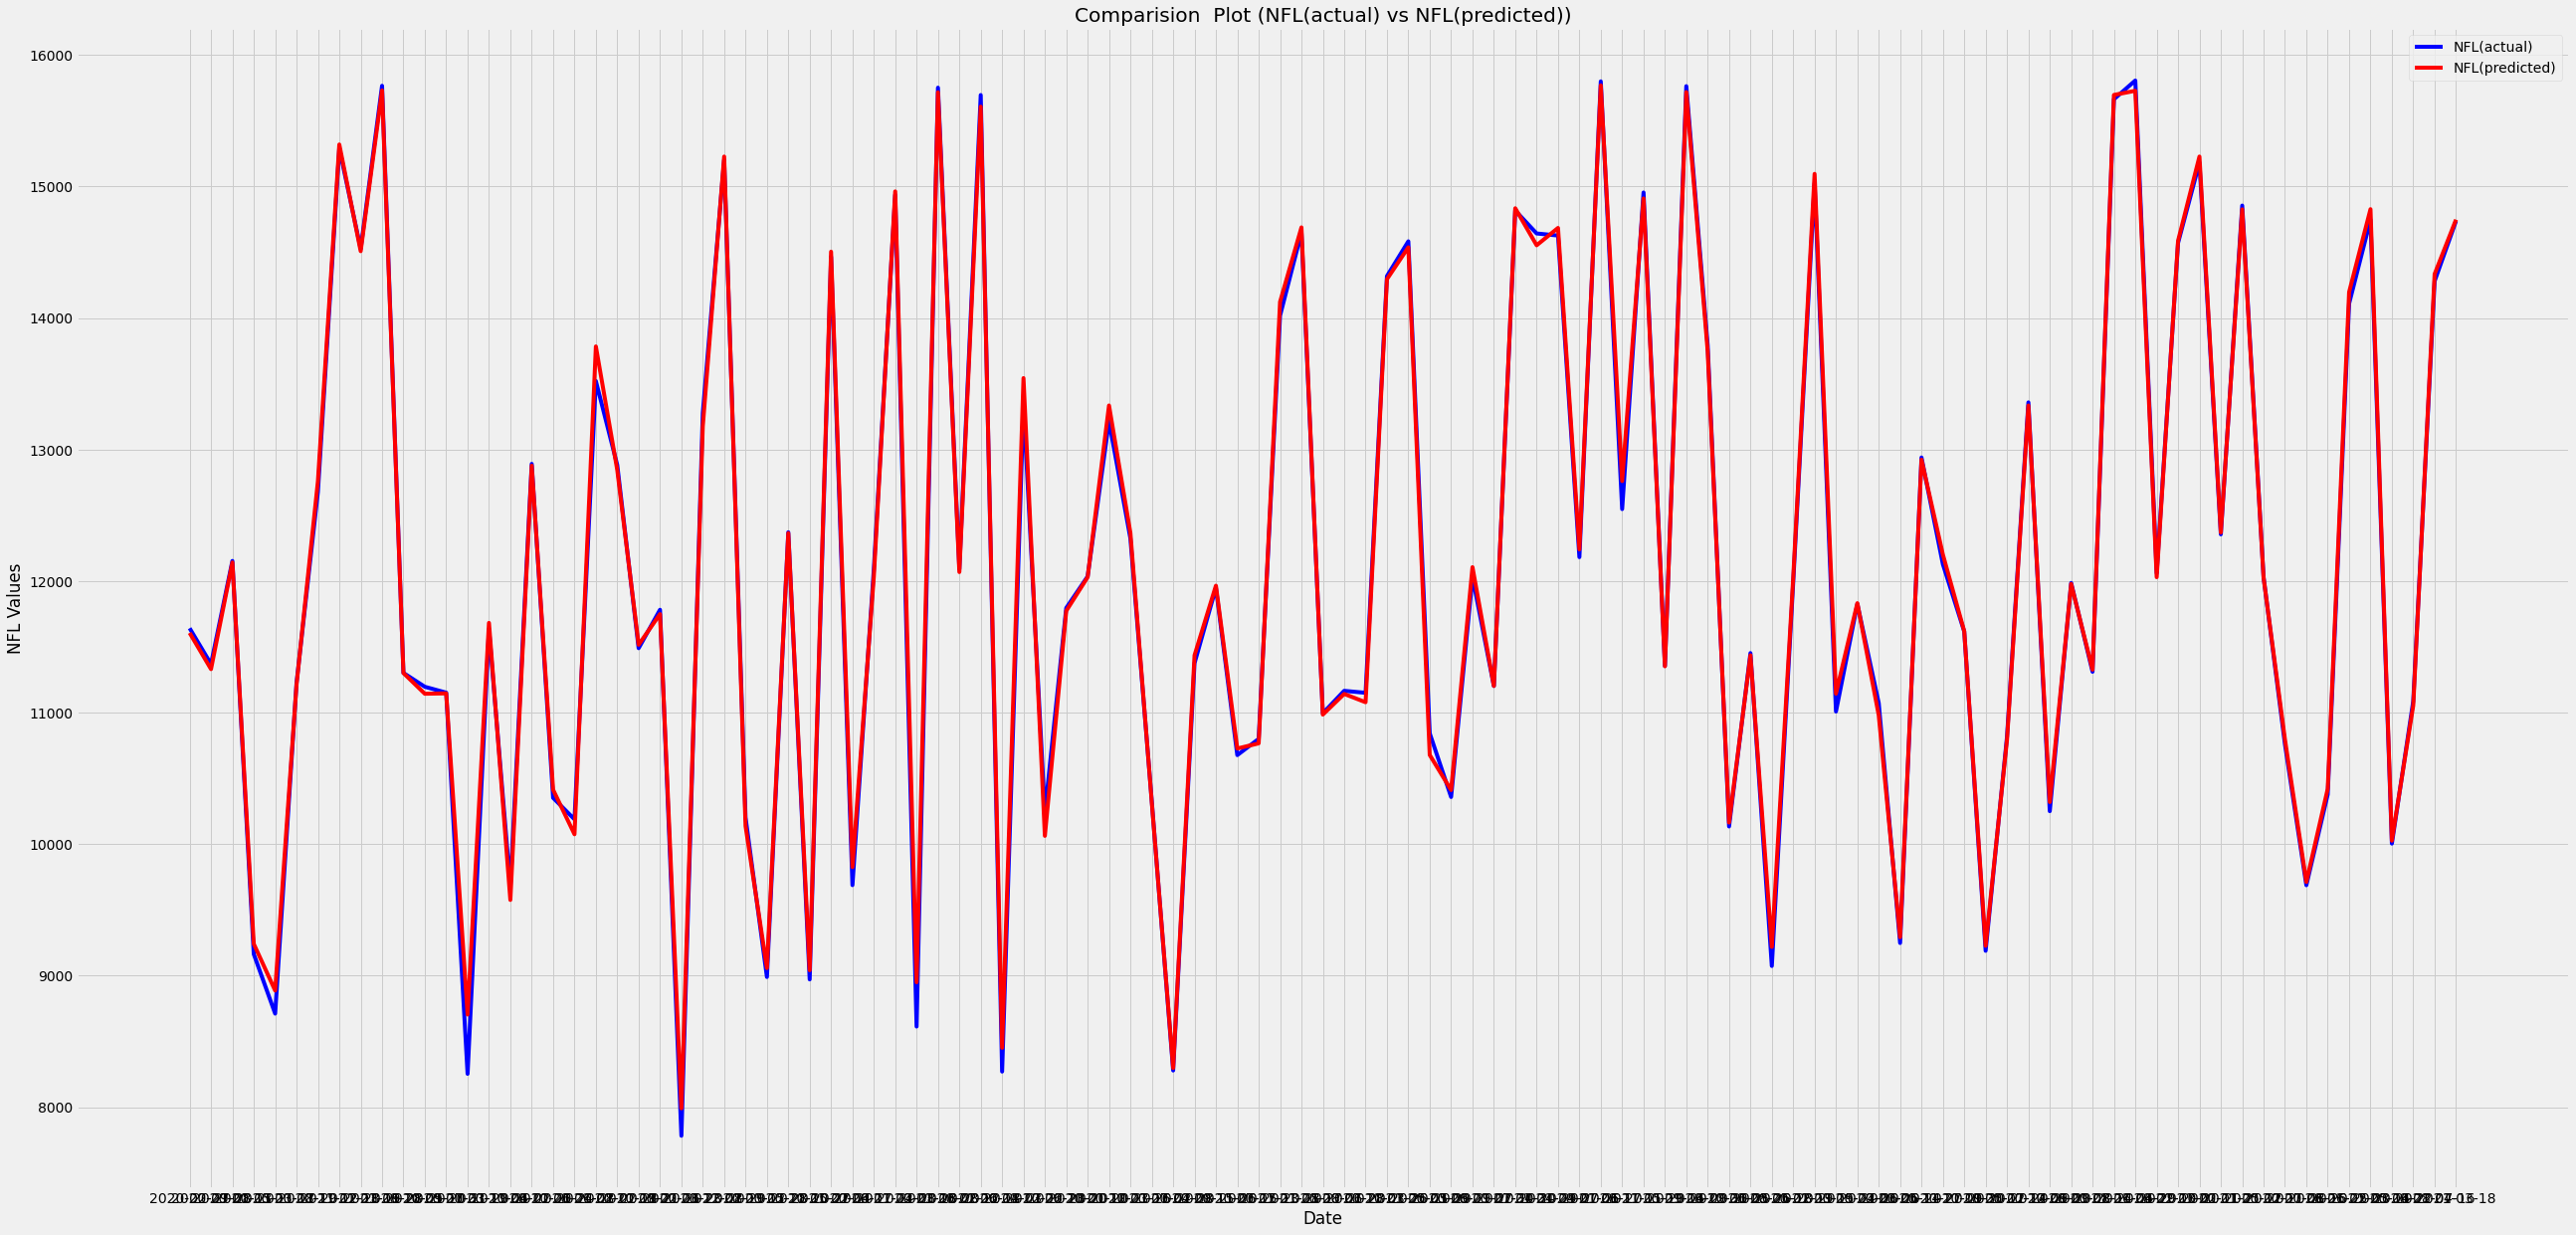

In [78]:
plt.figure(figsize=(40,20))
plt.plot(date,y_test,label='NFL(actual)',color='blue')
plt.plot(date,y_pred1,label='NFL(predicted)',color='red')
plt.grid(True)
plt.title('Comparision  Plot (NFL(actual) vs NFL(predicted))')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFL Values')
plt.style.use('fivethirtyeight')
plt.show()

In [79]:
col=['NFH(actual)','NFL(actual)','NFH(predicted)','NFL(predicted)']
fg1=pd.DataFrame(columns = col)
fg1.iloc[:,0]=fg3['NFH(actual)']
fg1.iloc[:,1]=fg4['NFL(actual)']
fg1.iloc[:,2]=y_pred
fg1.iloc[:,3]=y_pred1
fg1['Amount of Deviation:NFH (actual vs prediction)']=abs(fg1['NFH(actual)']-fg1['NFH(predicted)']).astype(float)
fg1['Amount of Deviation:NFL (actual vs prediction)']=abs(fg1['NFL(actual)']-fg1['NFL(predicted)']).astype(float)
fg1.to_csv('Dependent model Analysis.csv')
display(fg1)

,NFH(actual),NFL(actual),NFH(predicted),NFL(predicted),Amount of Deviation:NFH (actual vs prediction),Amount of Deviation:NFL (actual vs prediction)
0,11447.724682,11641.471080,11482.143555,11605.999023,34.418872,35.472057
1,11152.199831,11369.228411,11078.535156,11330.512695,73.664674,38.715716
2,11966.991009,12153.129310,11936.014648,12141.895508,30.976360,11.233803
3,8843.312217,9164.428481,8780.445312,9242.060547,62.866904,77.632066
4,9077.290301,8711.875397,8850.772461,8887.208984,226.517840,175.333587
...,...,...,...,...,...,...
102,14720.573452,14746.534002,14779.966797,14826.954102,59.393345,80.420099
103,9797.075753,10004.574643,9823.059570,10026.631836,25.983817,22.057193
104,10865.237878,11087.078088,10798.129883,11054.658203,67.107995,32.419885
105,14366.697618,14280.071672,14375.772461,14334.024414,9.074843,53.952742


### **Comparative Analysis between Dependent and Independent model algorithms**

In [80]:
d=pd.read_csv('Dependent model Analysis.csv')
id=pd.read_csv('Independent model Analysis.csv')

**Graphical Analysis of NFH values**

[2021-08-22 17:44:56] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:56] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:56] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:56] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


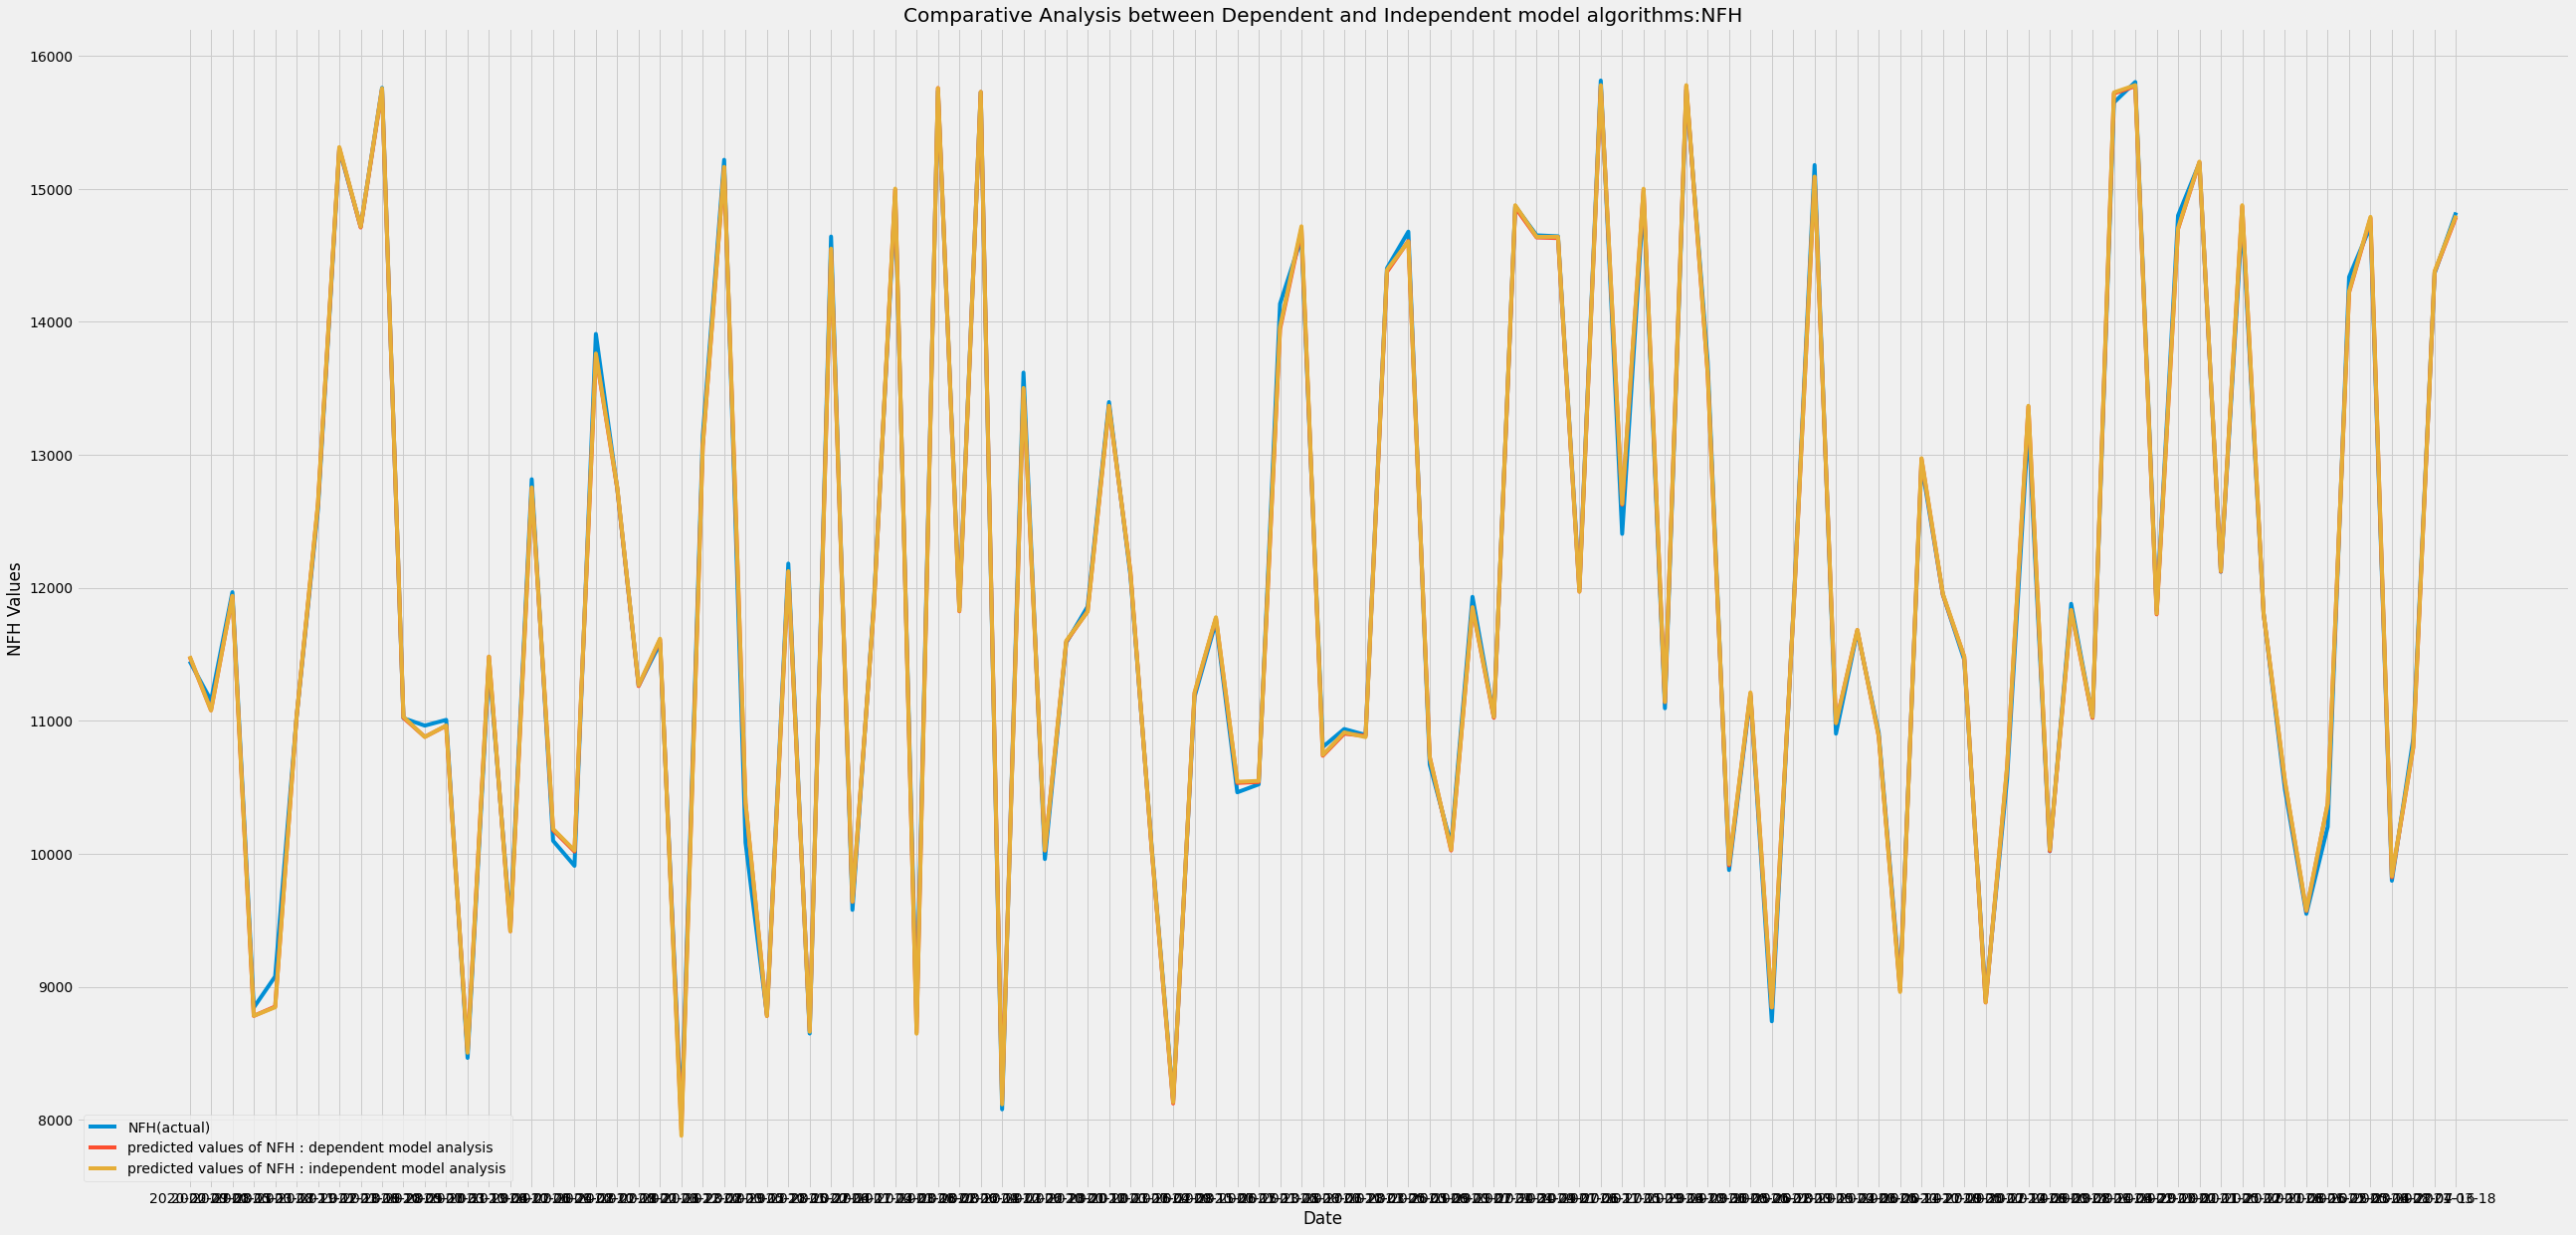

In [81]:
plt.figure(figsize=(40,20))
plt.plot(date,d['NFH(actual)'],label='NFH(actual)')
plt.plot(date,d['NFH(predicted)'],label='predicted values of NFH : dependent model analysis')
plt.plot(date,id['NFH(predicted)'],label='predicted values of NFH : independent model analysis')
plt.grid(True)
plt.title('Comparative Analysis between Dependent and Independent model algorithms:NFH')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH Values')
plt.style.use('fivethirtyeight')
plt.show()

**Amount of Deviation between the actual values and the predicted values for both the models based on NFH**

[2021-08-22 17:44:57] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:57] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:57] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:57] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


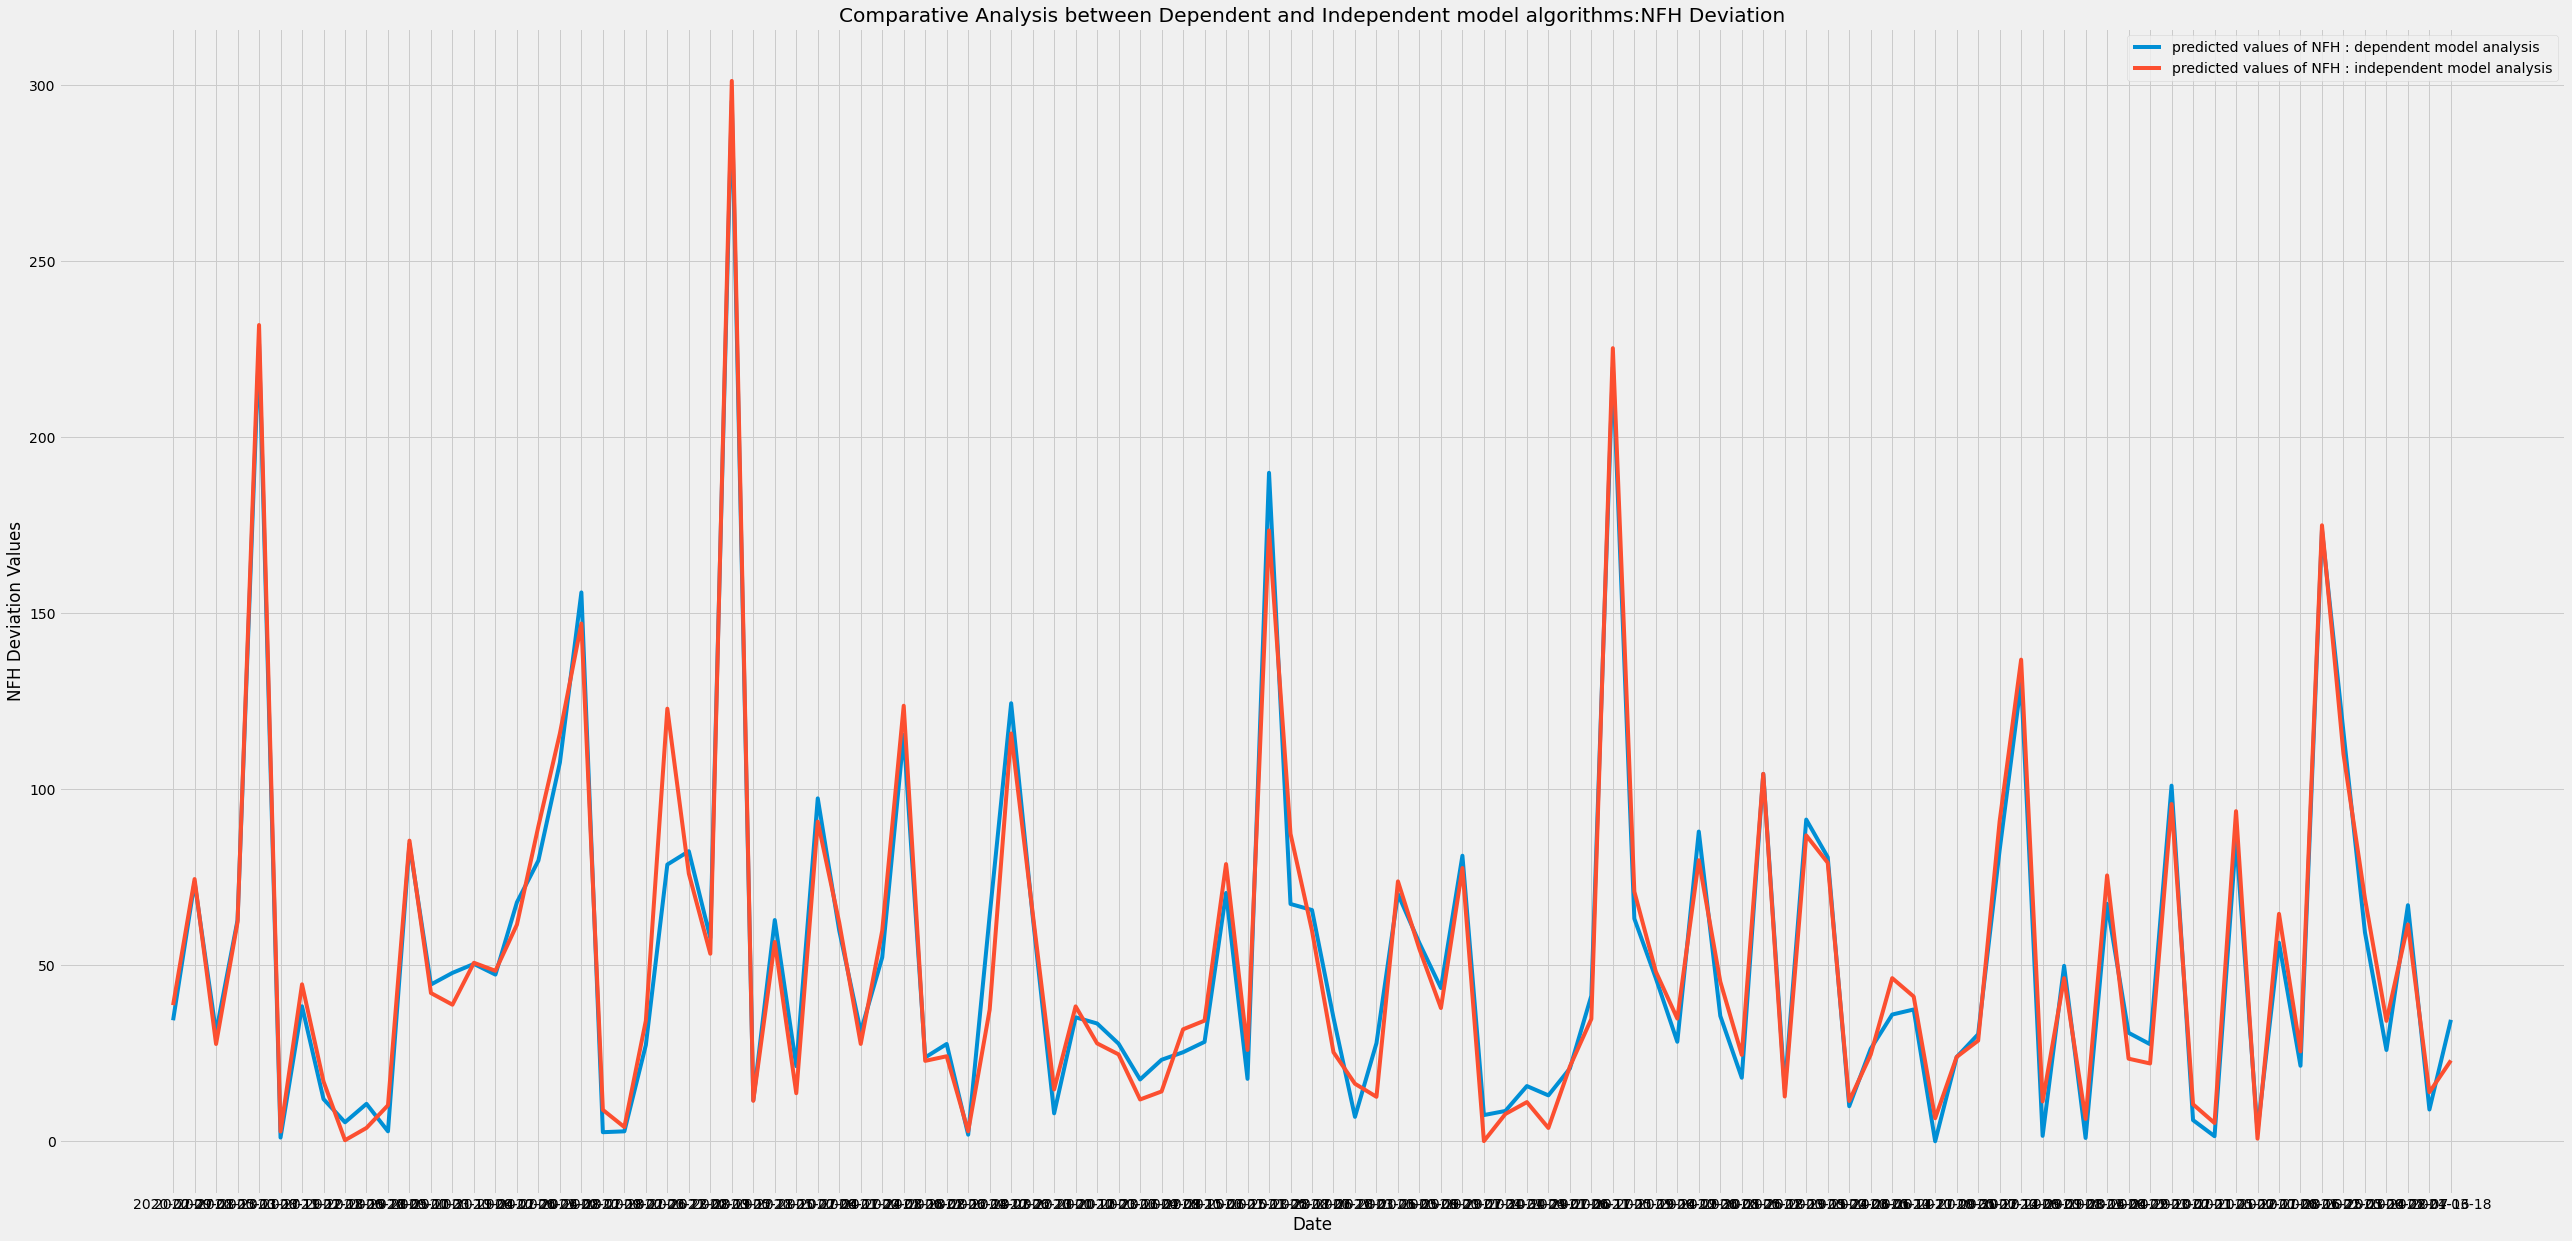

In [82]:
plt.figure(figsize=(40,20))
plt.plot(date,d['Amount of Deviation:NFH (actual vs prediction)'],label='predicted values of NFH : dependent model analysis')
plt.plot(date,id['Amount of Deviation:NFH (actual vs prediction)'],label='predicted values of NFH : independent model analysis')
plt.grid(True)
plt.title('Comparative Analysis between Dependent and Independent model algorithms:NFH Deviation')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFH Deviation Values')
plt.style.use('fivethirtyeight')
plt.show()

**Graphical Analysis of NFL values**

[2021-08-22 17:44:59] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:59] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:59] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:44:59] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


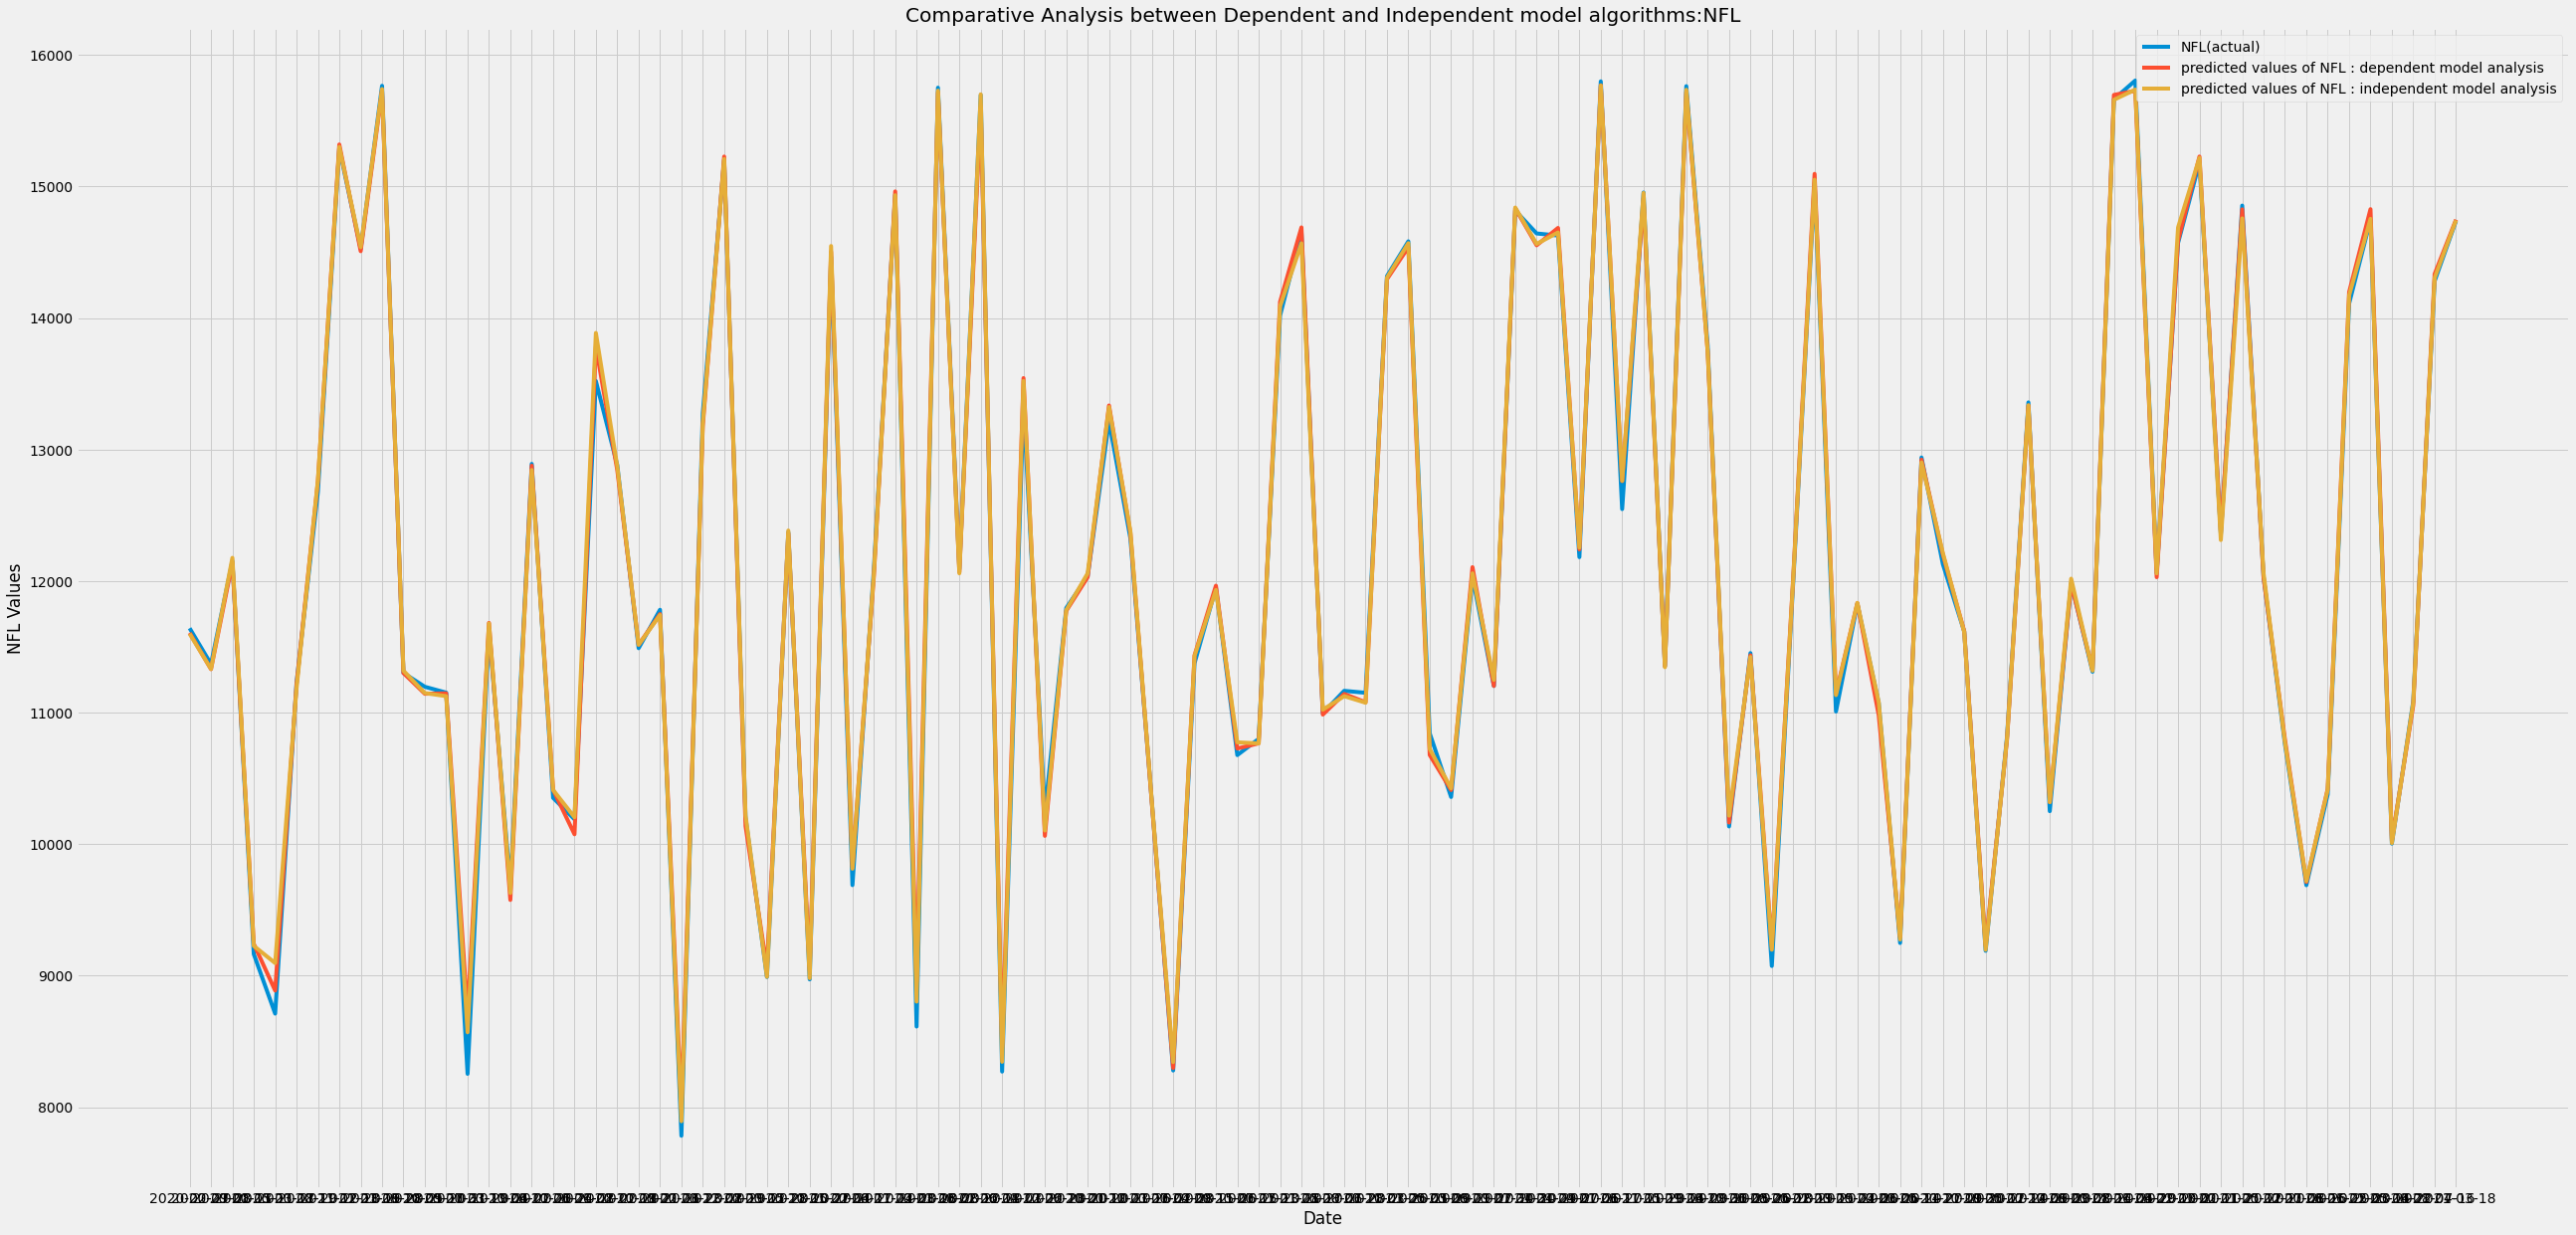

In [83]:
plt.figure(figsize=(40,20))
plt.plot(date,d['NFL(actual)'],label='NFL(actual)')
plt.plot(date,d['NFL(predicted)'],label='predicted values of NFL : dependent model analysis')
plt.plot(date,id['NFL(predicted)'],label='predicted values of NFL : independent model analysis')
plt.grid(True)
plt.title('Comparative Analysis between Dependent and Independent model algorithms:NFL')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFL Values')
plt.style.use('fivethirtyeight')
plt.show()

**Amount of Deviation between the actual values and the predicted values for both the models based on NFL**

[2021-08-22 17:45:01] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:45:01] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:45:01] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2021-08-22 17:45:01] INFO (matplotlib.category/MainThread) Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


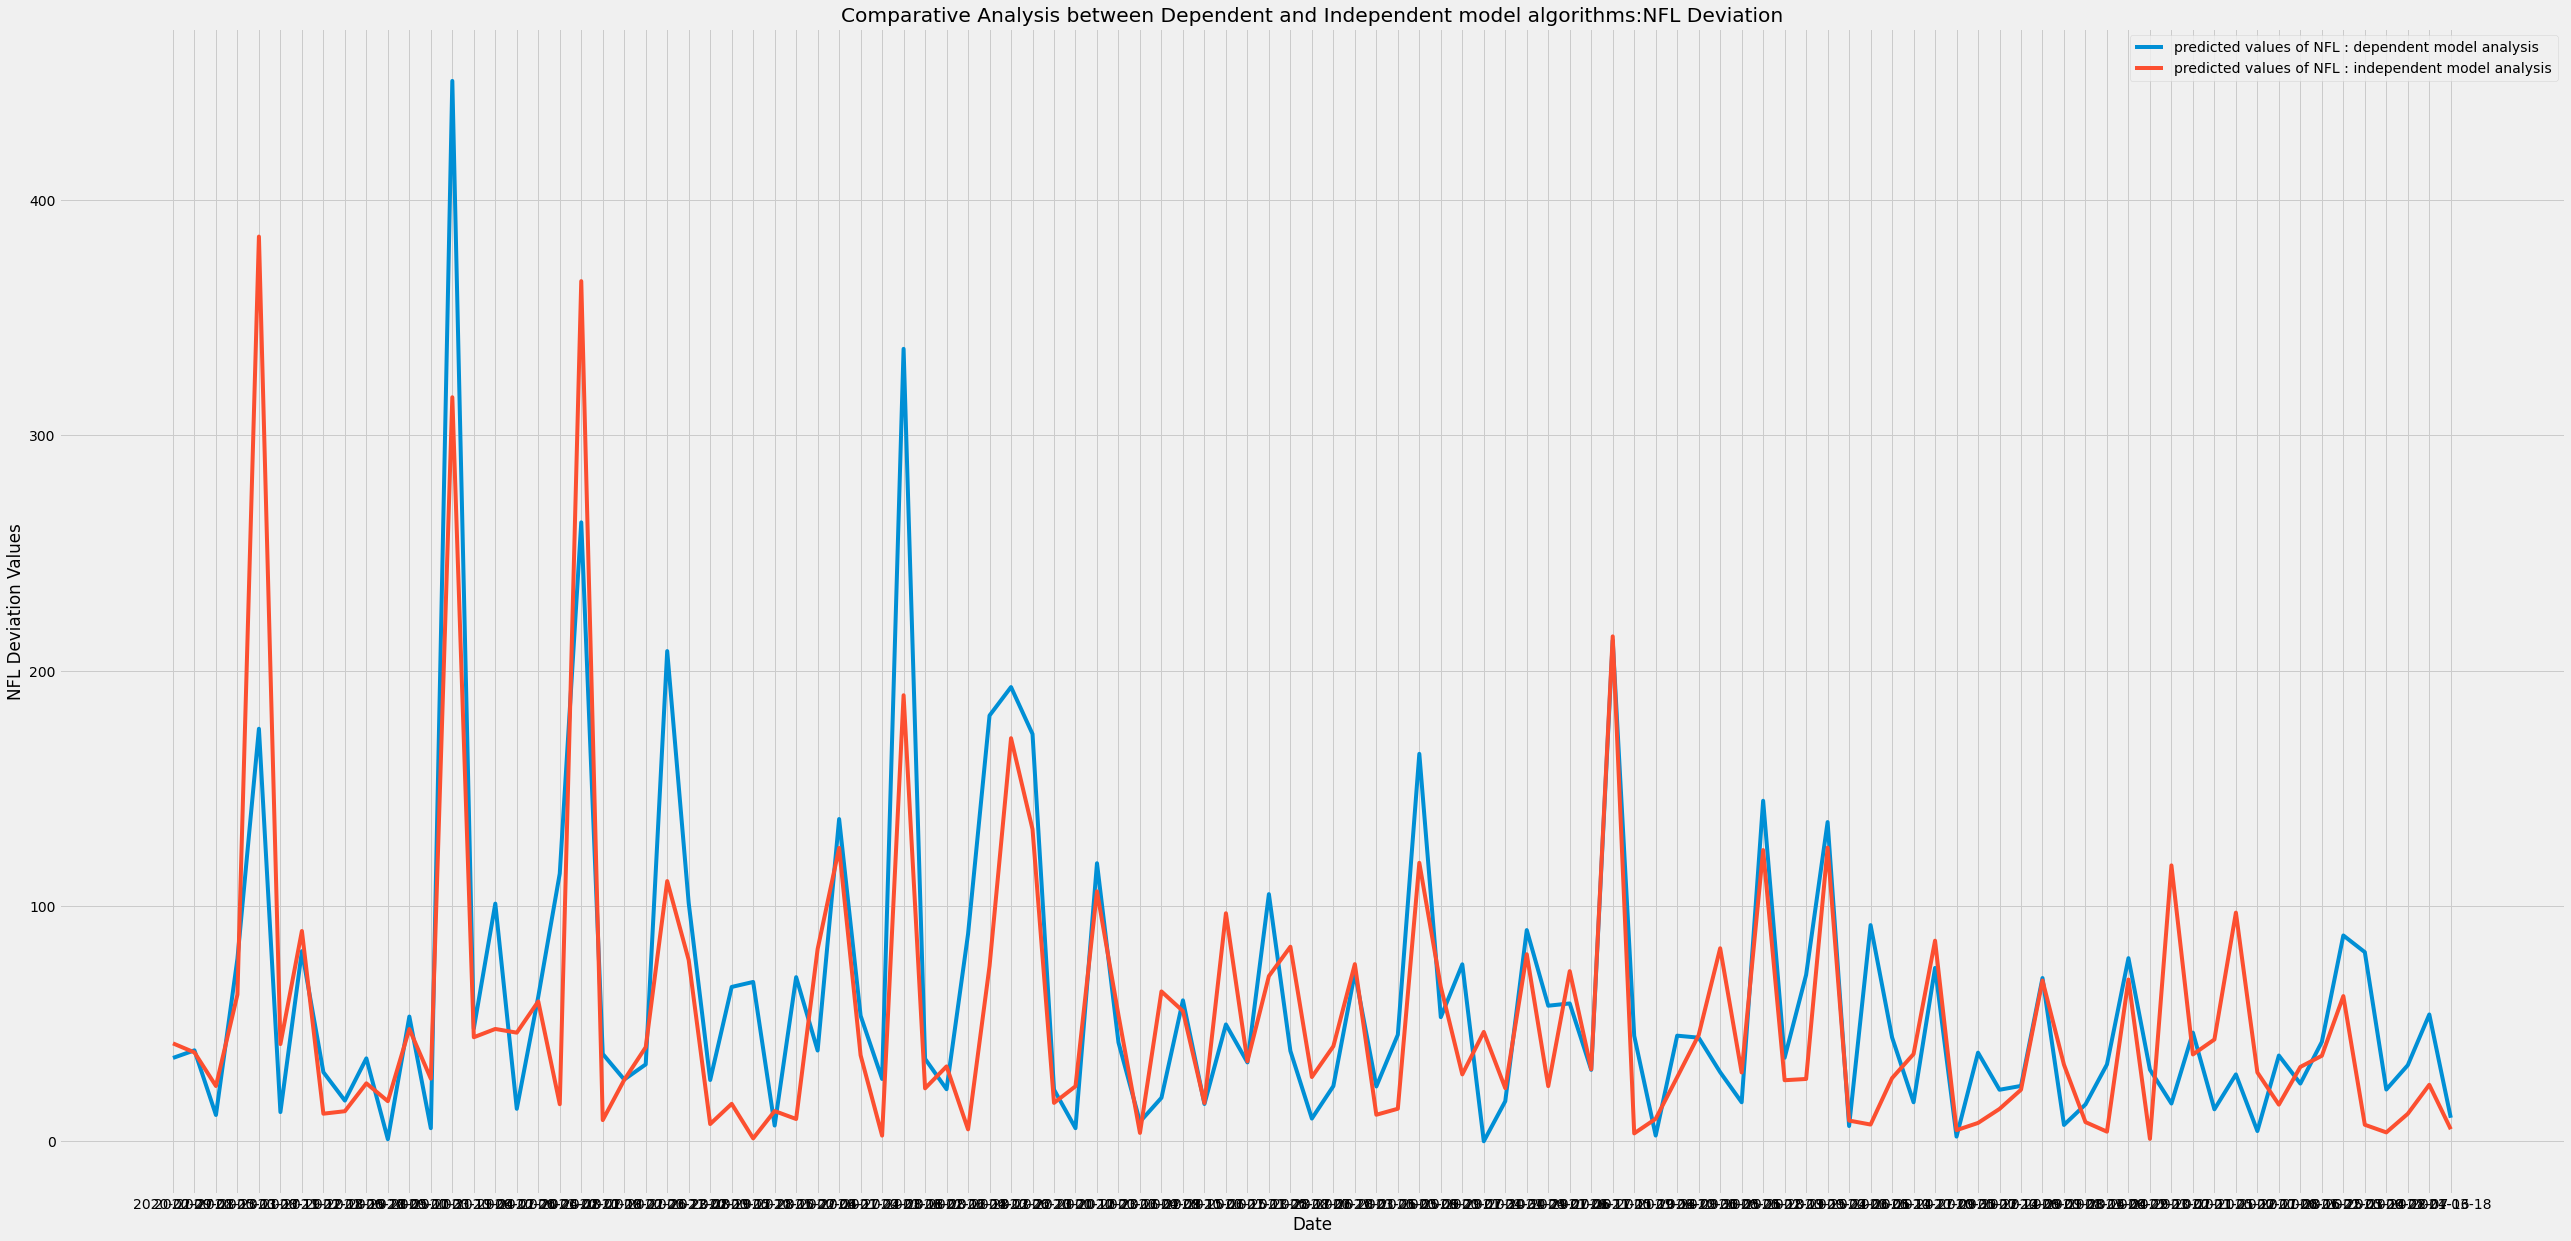

In [84]:
plt.figure(figsize=(40,20))
plt.plot(date,d['Amount of Deviation:NFL (actual vs prediction)'],label='predicted values of NFL : dependent model analysis')
plt.plot(date,id['Amount of Deviation:NFL (actual vs prediction)'],label='predicted values of NFL : independent model analysis')
plt.grid(True)
plt.title('Comparative Analysis between Dependent and Independent model algorithms:NFL Deviation')
plt.legend()
plt.xlabel('Date')
plt.ylabel('NFL Deviation Values')
plt.style.use('fivethirtyeight')
plt.show()

**Based on the above comparative anaylsis graphs sir , one can choose the best model structure/implementation required to train/predict the same**

## **Conclusion**

**I would like to point out that there would be a rare possibility that both the Dependent model analysis.csv, indpendent model analysis.csv would be the same,but due to the fact these models operate using different logic hence the probability of dependent model analysis.csv and independent model analysis.csv would not be the same(i.e there would be a slight difference of values between them), i have enclosed a copy of the datasets for supporting the same sir.**


**Note: Hyper tuning for the models would be done automatically by NNI**

**Thank you**

